In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Data Overview

In [2]:
df = pd.read_csv('E:\Maknadata\Odyssey 1  Data Set - Telco Data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df[df['Churn'] == 'Yes']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [8]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# EDA

In [9]:
def univariate_bar(col, size=(5, 5), putar = False):
    if putar == False:
        plt.figure(figsize=size)
        data = df[col].value_counts().reset_index()
        data.columns = [col, 'Count']
        sns.barplot(x=col, y='Count', data=data, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Count')
        plt.xlabel(col)
        plt.show()


def univariate_kdeplot(col, size=(5, 5)):
    plt.figure(figsize=size)
    sns.kdeplot(df[col], shade=True, color='b')
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.ylabel('Density', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

## Univariate

### Gender

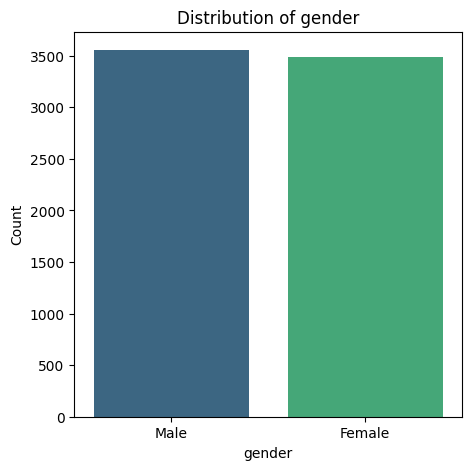

In [10]:
univariate_bar('gender')

### Senior Citizen

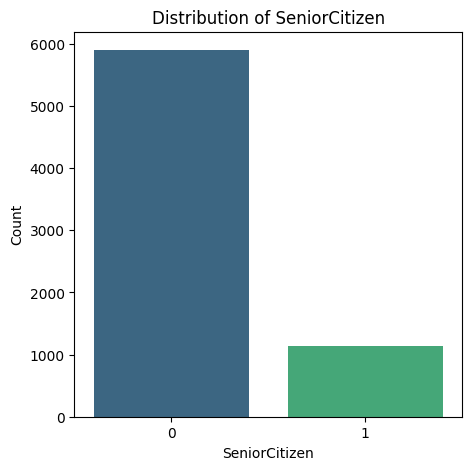

In [11]:
univariate_bar('SeniorCitizen')

### Partner

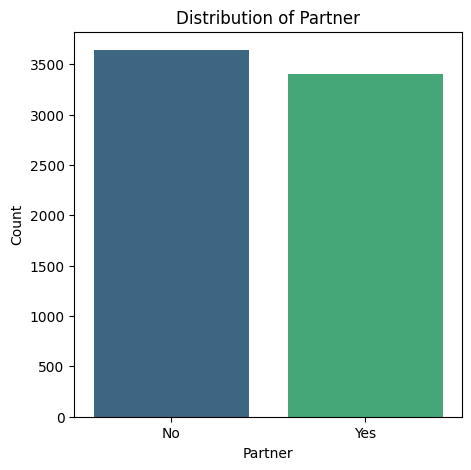

In [12]:
univariate_bar('Partner')

### Dependents

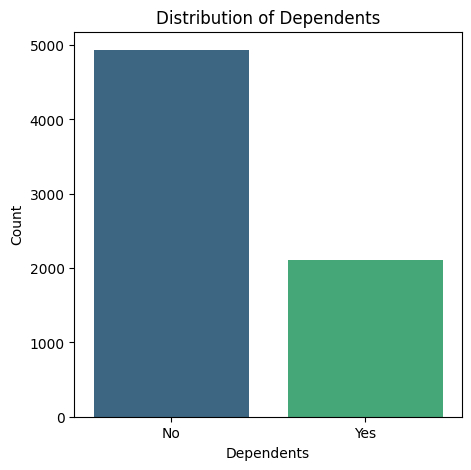

In [13]:
univariate_bar('Dependents')

### tenure

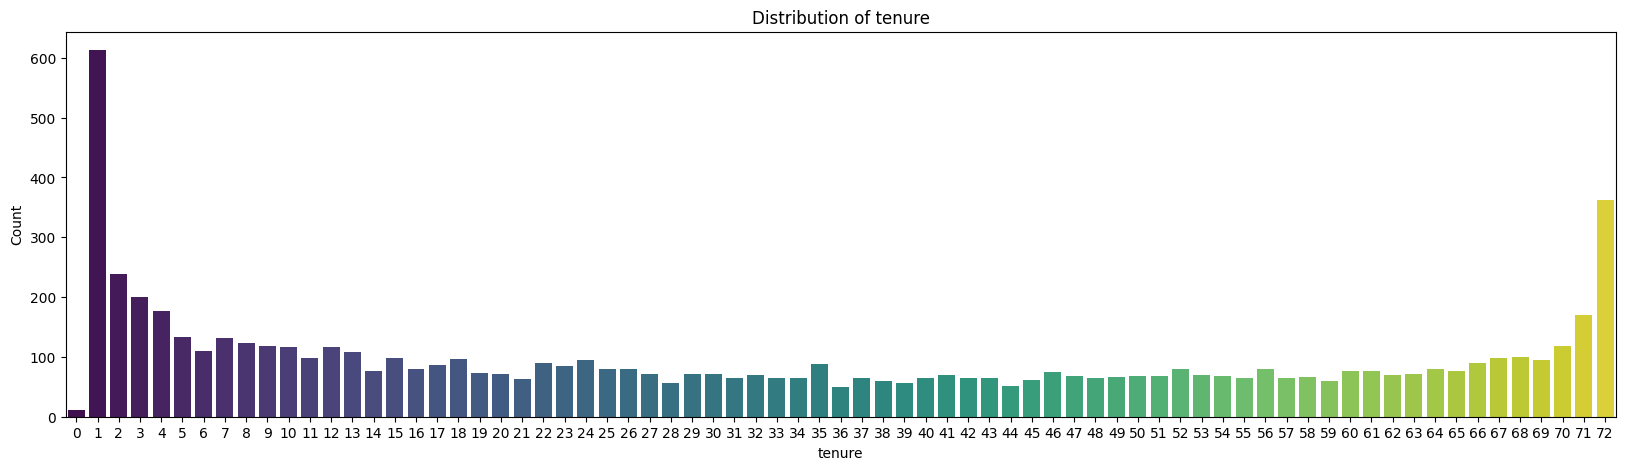

In [14]:
univariate_bar('tenure', size=(20, 5))

### PhoneService

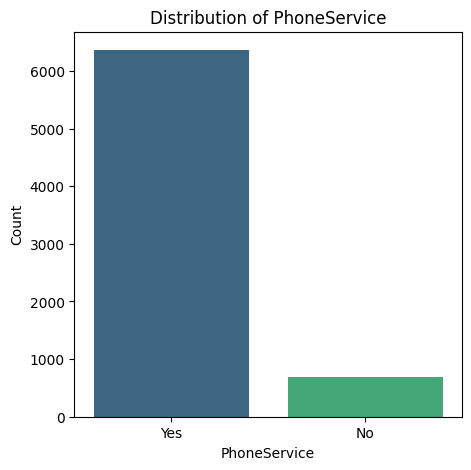

In [15]:
univariate_bar('PhoneService')

### MultipleLines

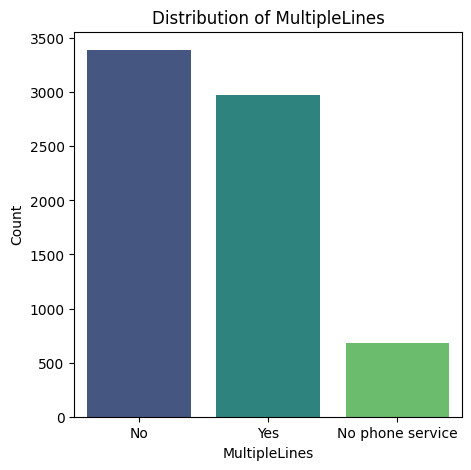

In [16]:
univariate_bar('MultipleLines')

### InternetService

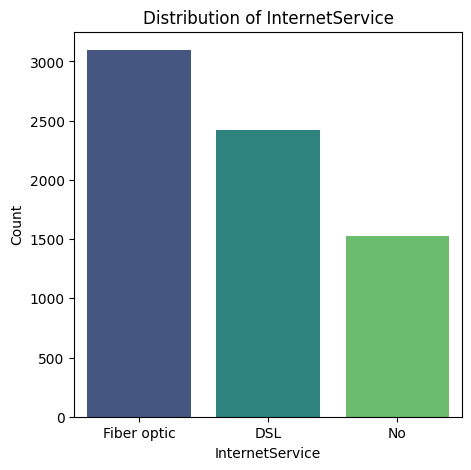

In [17]:
univariate_bar('InternetService')

### OnlineSecurity

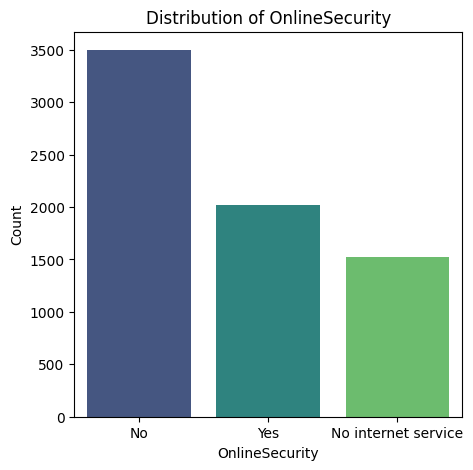

In [18]:
univariate_bar('OnlineSecurity')

### OnlineBackup

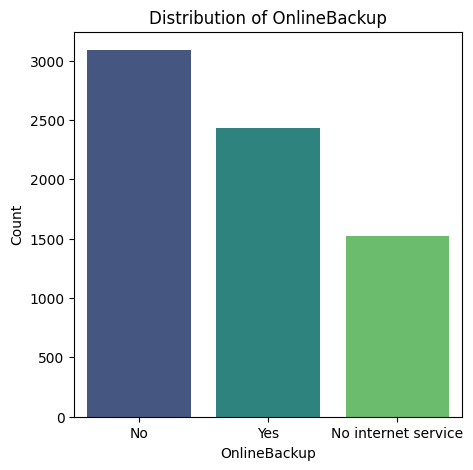

In [19]:
univariate_bar('OnlineBackup')

### DeviceProtection

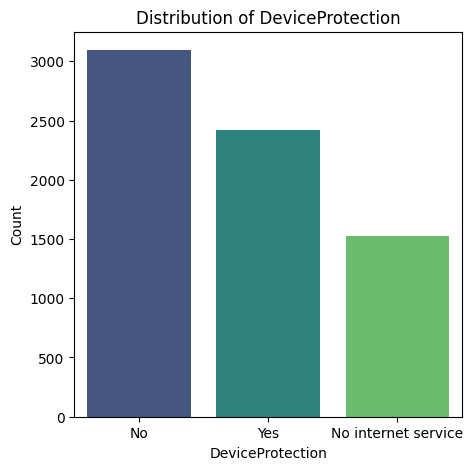

In [20]:
univariate_bar('DeviceProtection')

### TechSupport

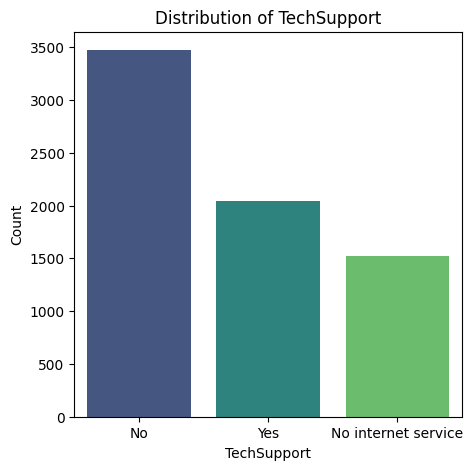

In [21]:
univariate_bar('TechSupport')

### StreamingTV

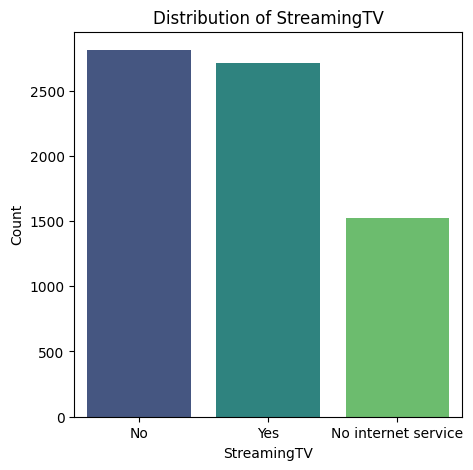

In [22]:
univariate_bar('StreamingTV')

### StreamingMovies

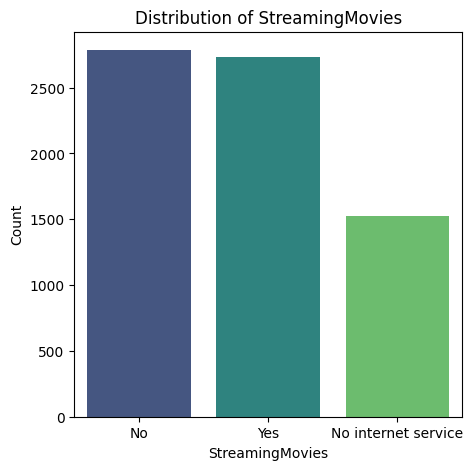

In [23]:
univariate_bar('StreamingMovies')

### Contract

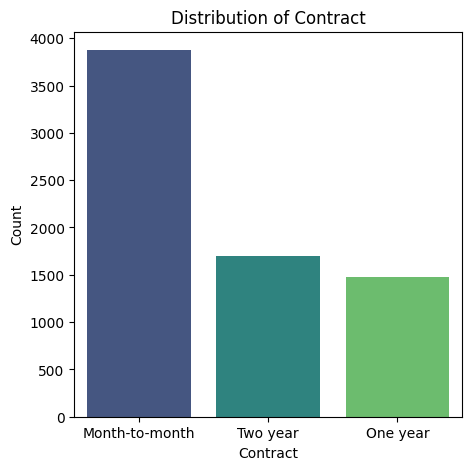

In [24]:
univariate_bar('Contract')

### PaperlessBilling

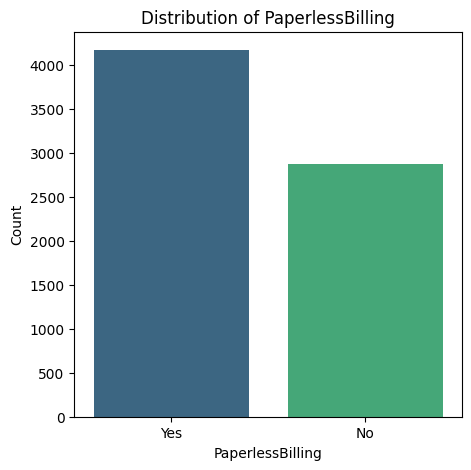

In [25]:
univariate_bar('PaperlessBilling')

### PaymentMethod

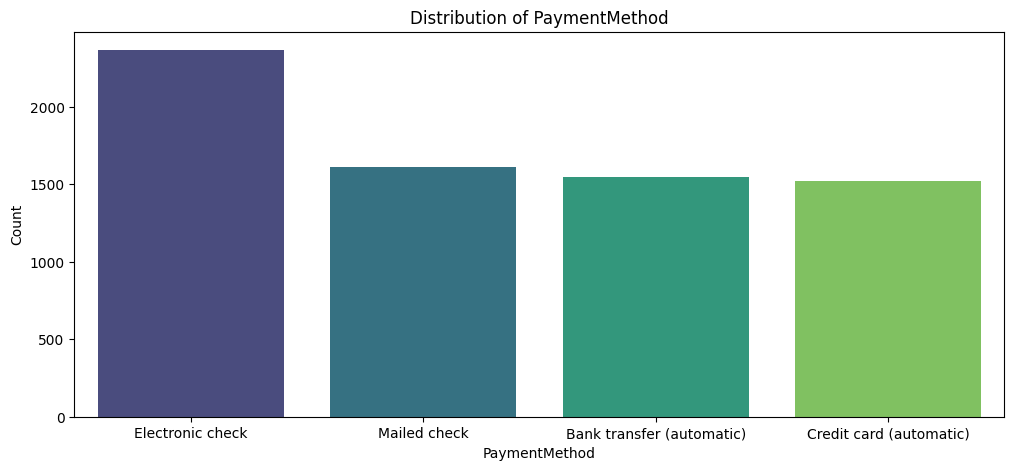

In [26]:
univariate_bar('PaymentMethod', size=(12, 5))

### MonthlyCharges

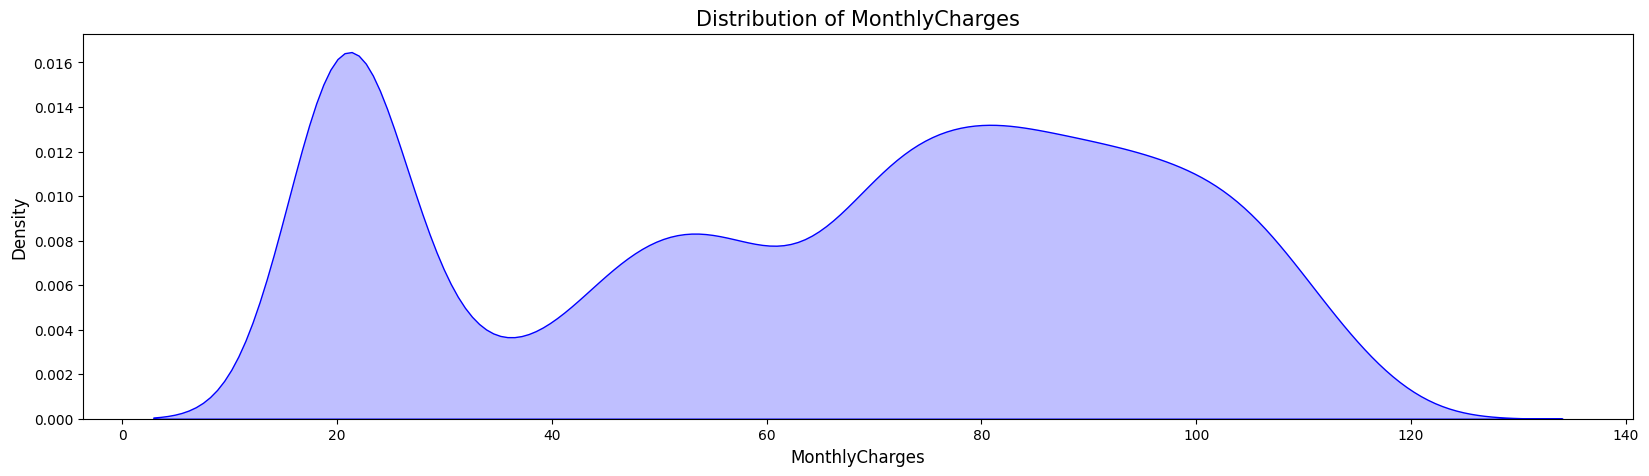

In [27]:
univariate_kdeplot('MonthlyCharges', size=(20, 5))

### TotalCharges

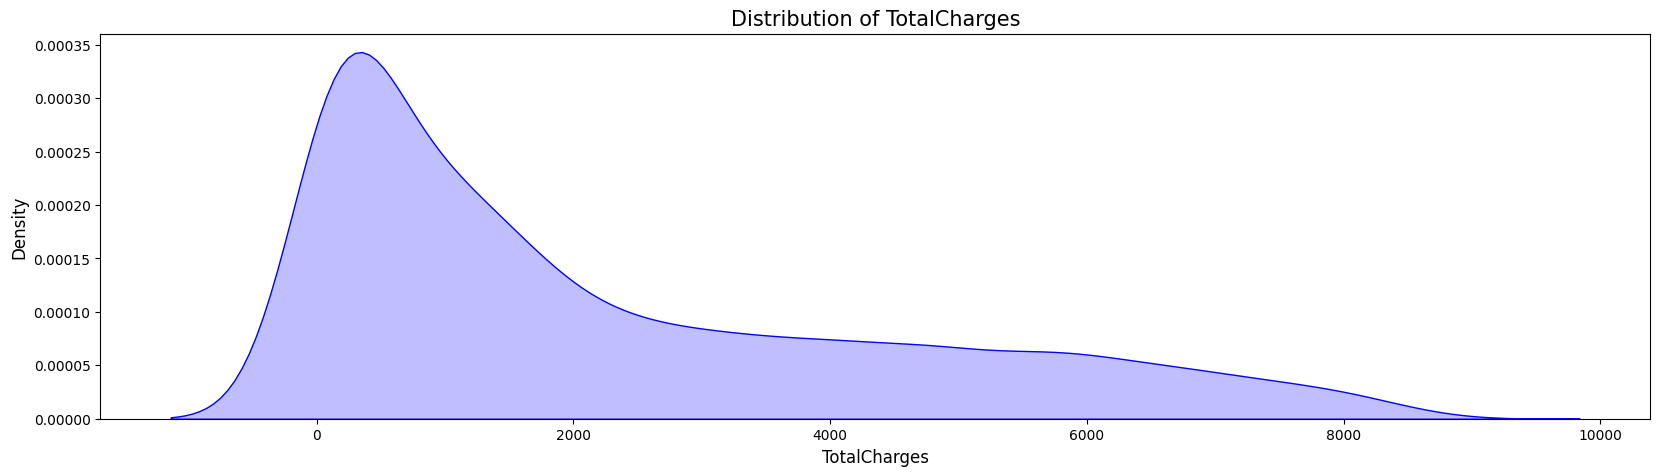

In [28]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
univariate_kdeplot('TotalCharges', size=(20, 5))

### Churn

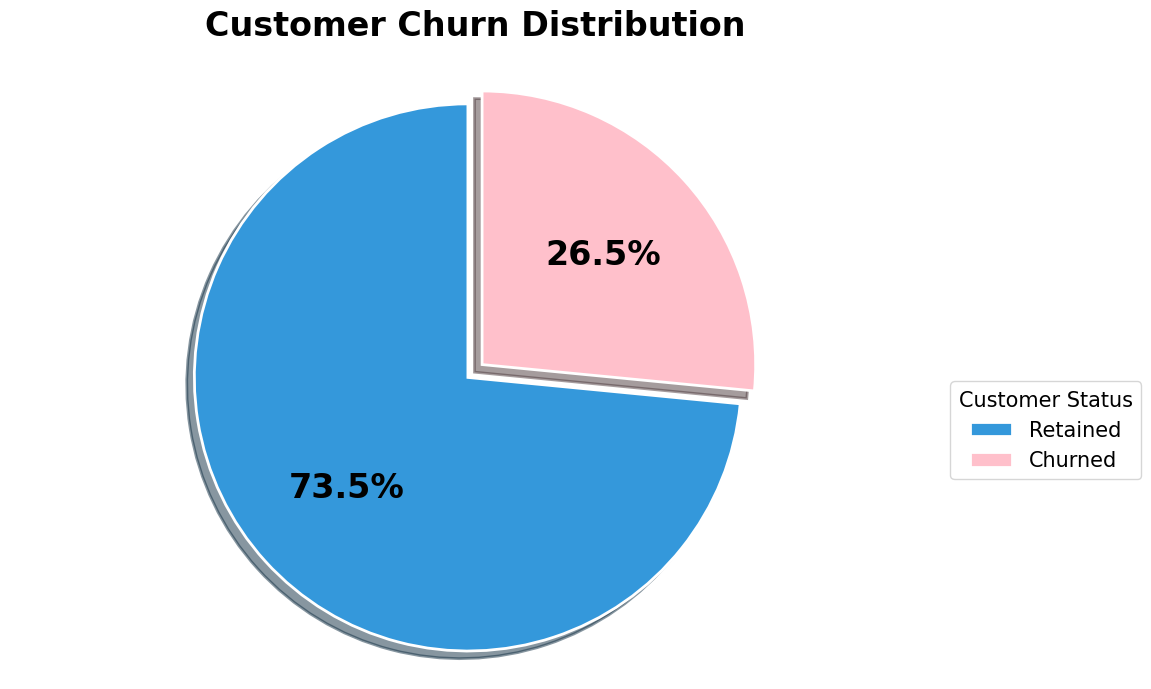

In [29]:
plt.figure(figsize=(12, 8))
colors = ['#3498db', 'pink']  # Blue for No, Red for Yes
explode = (0.05, 0.02)  # Slightly explode both slices

# Create pie chart with enhanced styling
patches, texts, autotexts = plt.pie(df['Churn'].value_counts(), 
                                  explode=explode,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  shadow=True,
                                  textprops={'fontsize': 12},
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Enhance text properties
plt.setp(autotexts, size=24, weight="bold", color="black")
plt.setp(texts, size=24, weight="bold")

# Add title with enhanced styling
plt.title('Customer Churn Distribution', 
          fontsize=24, 
          fontweight='bold', 
          pad=20,
          color='black')

# Add a legend
plt.legend(['Retained', 'Churned'], 
          loc='best', 
          bbox_to_anchor=(1, 0.5),
          title='Customer Status',
          title_fontsize=15,
          fontsize=15)

plt.axis('equal')
plt.show()

## Bivariate

In [30]:
def bivariate_bar(col1, col2='Churn', size=(10, 5)):
    plt.figure(figsize=size)
    sns.countplot(x=col1, hue=col2, data=df, palette=['blue', 'pink'], edgecolor='black')
    plt.title(f'{col1} and {col2} distribution', fontsize=18, fontweight='bold')
    plt.xlabel(col1, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title=col2, fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

def bivariate_kdeplot(col1, col2='Churn', size=(10, 5)):
    plt.figure(figsize=size)
    sns.kdeplot(df[df[col2] == 'Yes'][col1], label='Churn: Yes', shade=True, color='pink')
    sns.kdeplot(df[df[col2] == 'No'][col1], label='Churn: No', shade=True, color='blue')
    plt.title(f'{col1} and {col2} distribution', fontsize=18, fontweight='bold')
    plt.xlabel(col1, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(title=col2, fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

### Gender

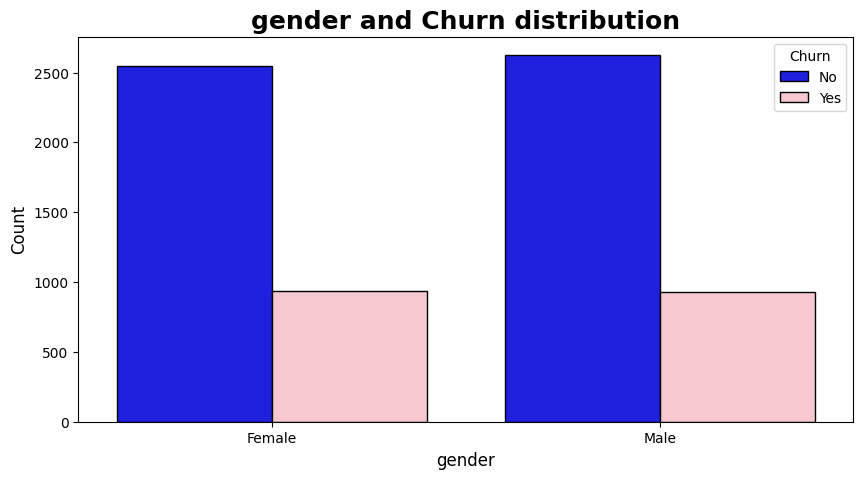

In [31]:
bivariate_bar('gender')

### SeniorCitizen

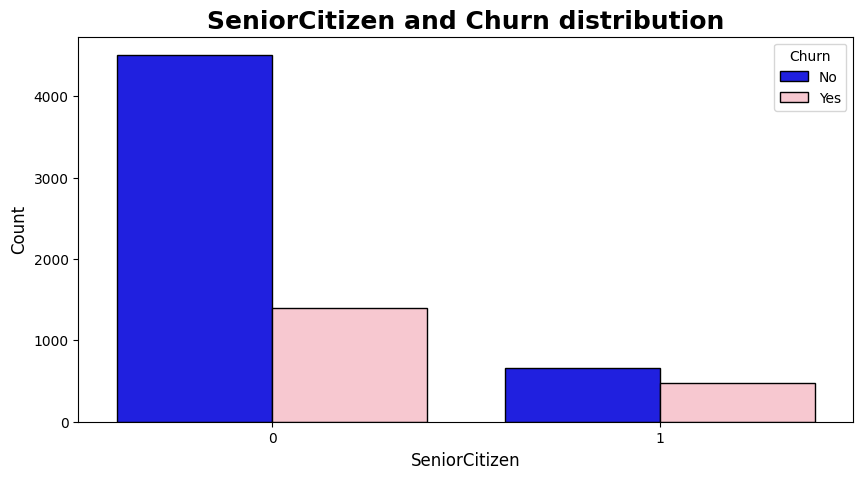

In [32]:
bivariate_bar('SeniorCitizen')

### Partner

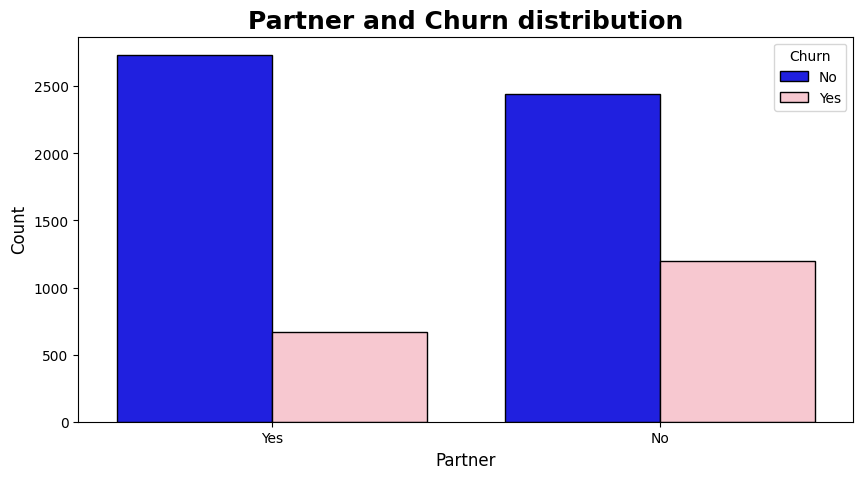

In [33]:
bivariate_bar('Partner')

### Dependents

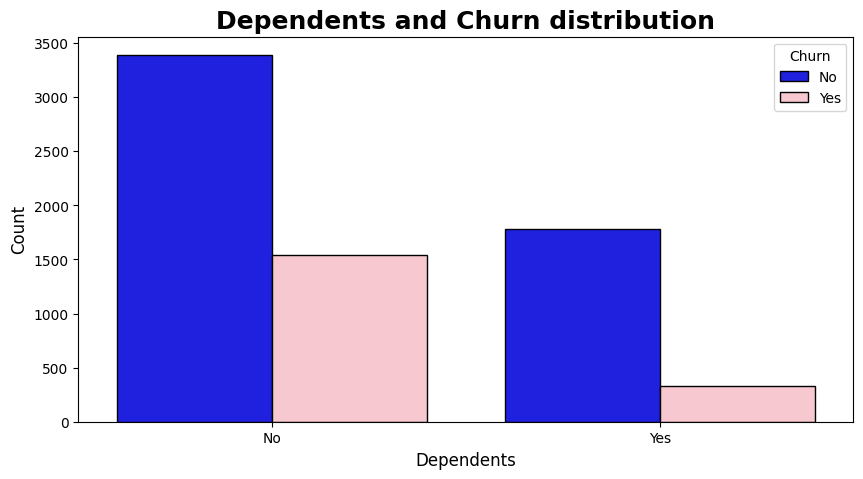

In [34]:
bivariate_bar('Dependents')

### tenure

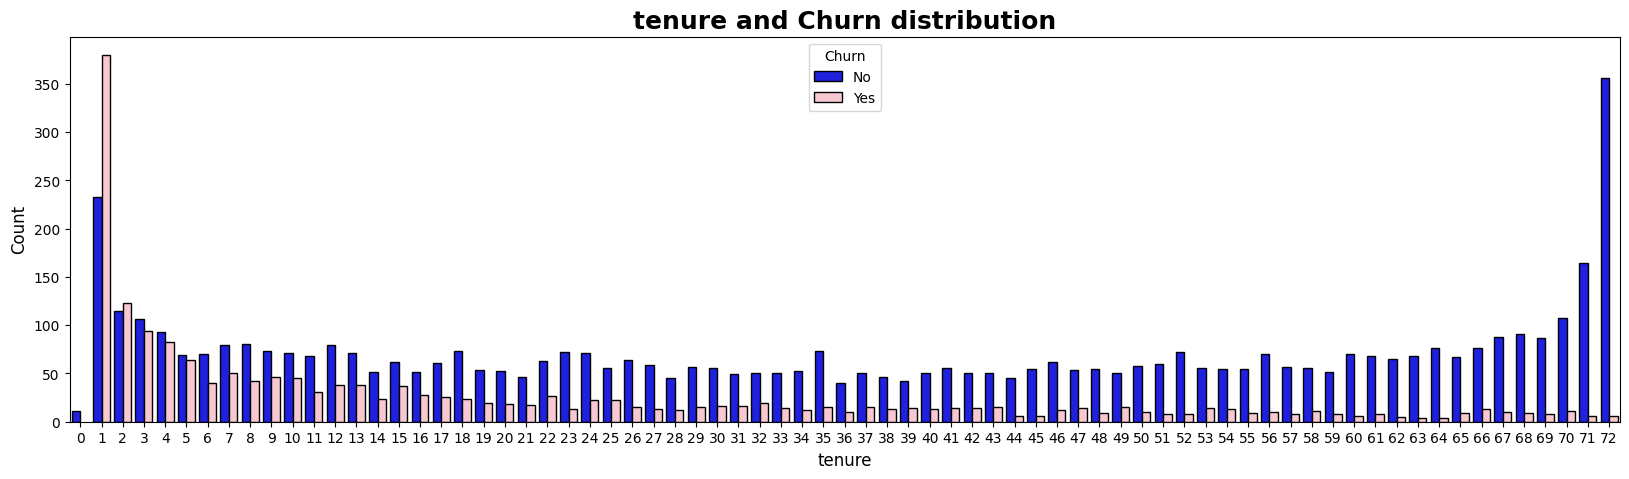

In [35]:
bivariate_bar('tenure', size=(20, 5))

### PhoneService

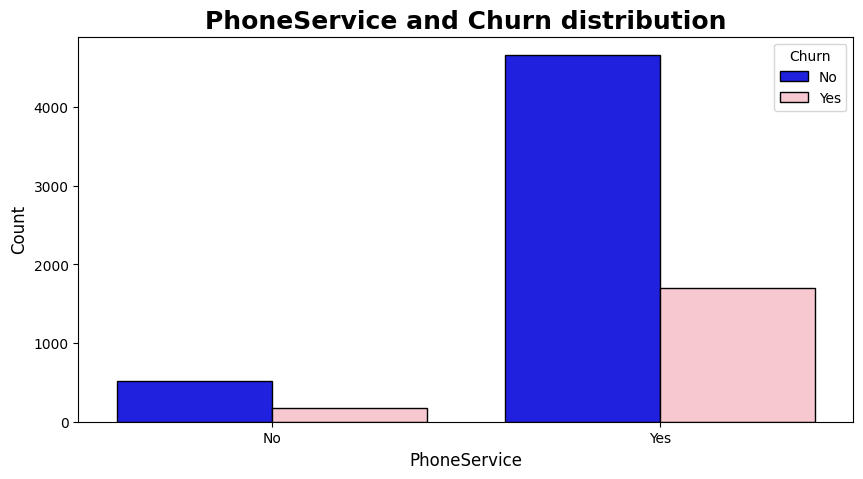

In [36]:
bivariate_bar('PhoneService')

### MultipleLines

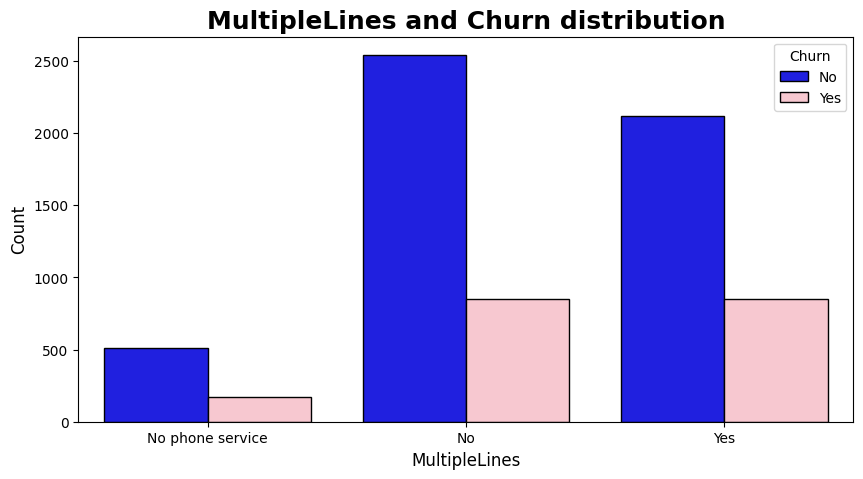

In [37]:
bivariate_bar('MultipleLines')

### InternetService

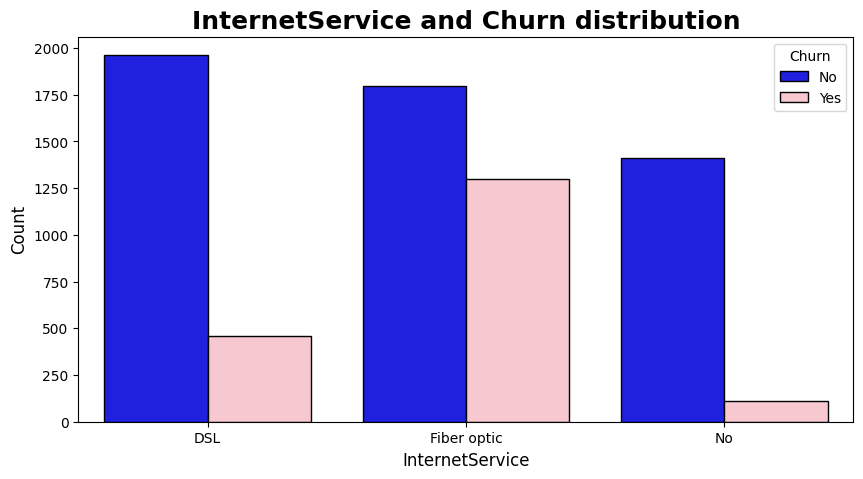

In [38]:
bivariate_bar('InternetService')

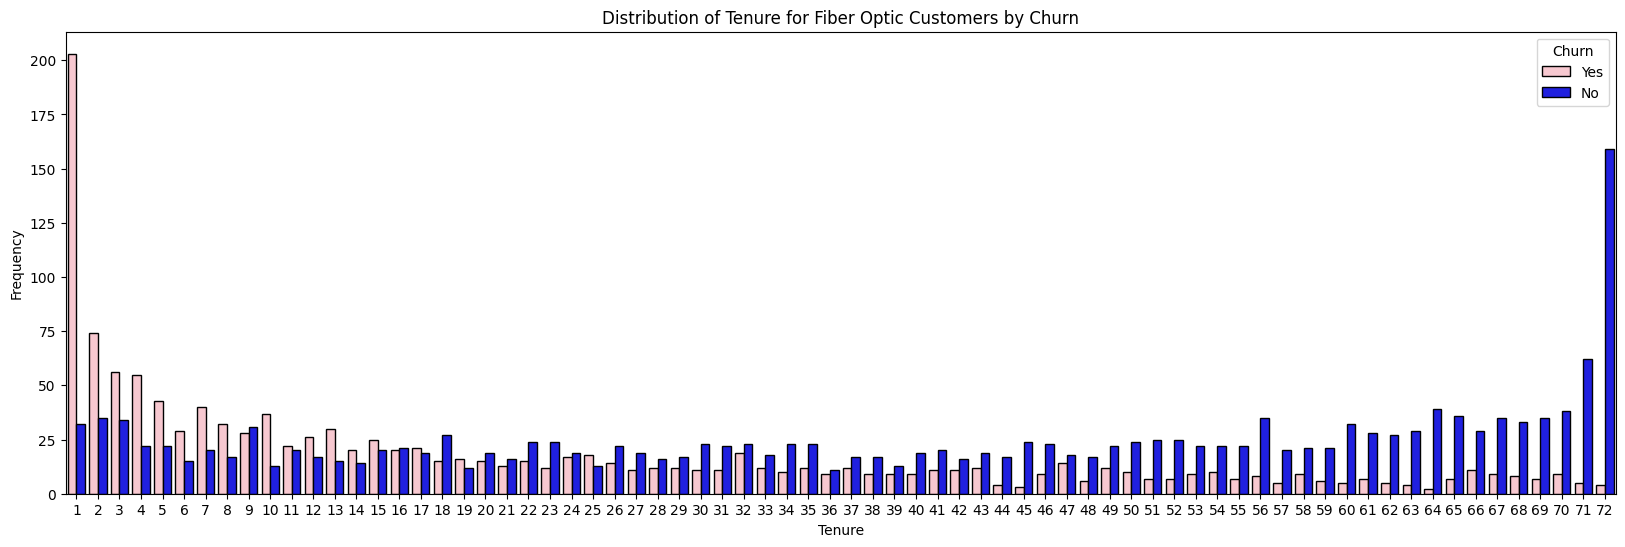

In [39]:
plt.figure(figsize=(20, 6))
data = df[df['InternetService'] == 'Fiber optic']
sns.countplot(x='tenure', hue='Churn', data=data, palette=['pink', 'blue'], edgecolor='black')
plt.title('Distribution of Tenure for Fiber Optic Customers by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

### OnlineSecurity

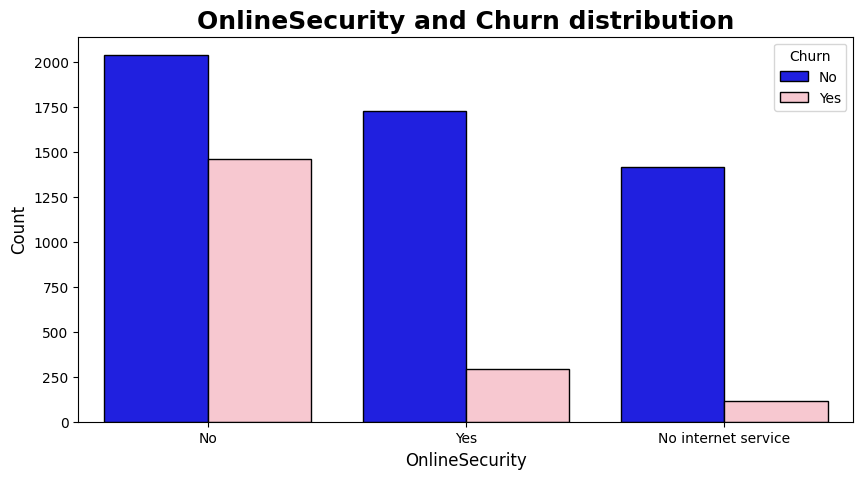

In [40]:
bivariate_bar('OnlineSecurity')

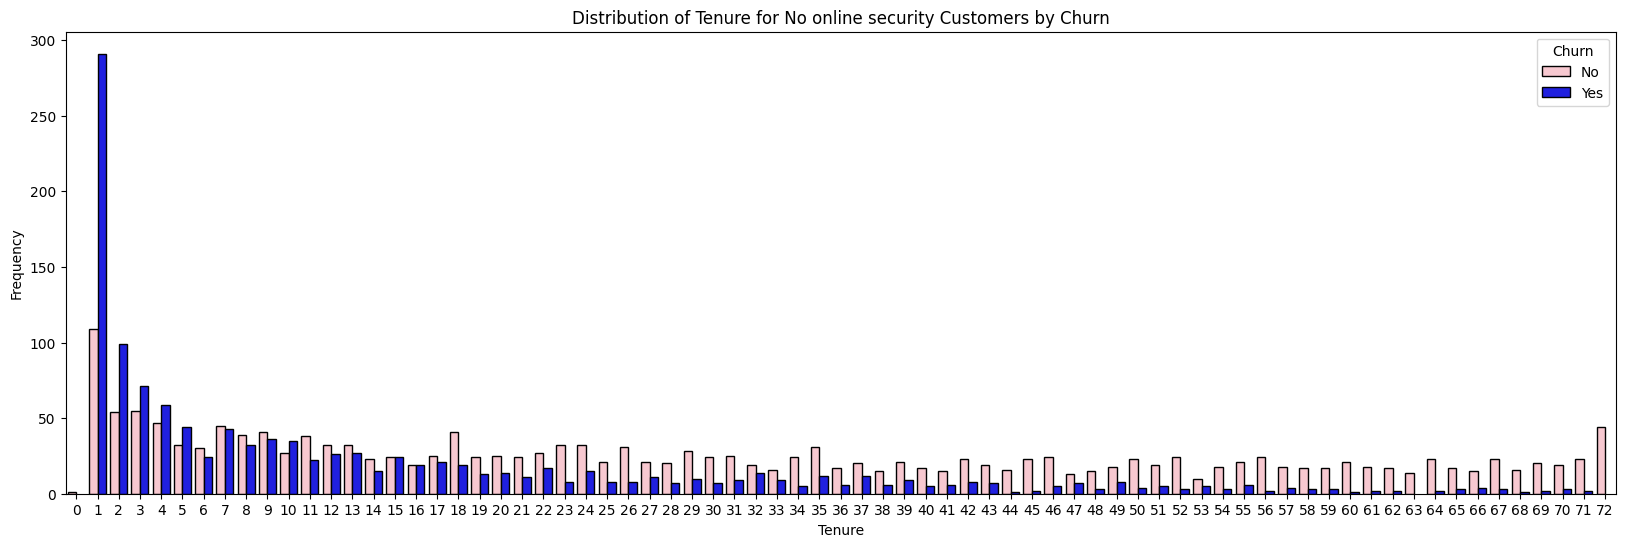

In [41]:
plt.figure(figsize=(20, 6))
data = df[df['OnlineBackup'] == 'No']
sns.countplot(x='tenure', hue='Churn', data=data, palette=['pink', 'blue'], edgecolor='black')
plt.title('Distribution of Tenure for No online security Customers by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

### OnlineBackup

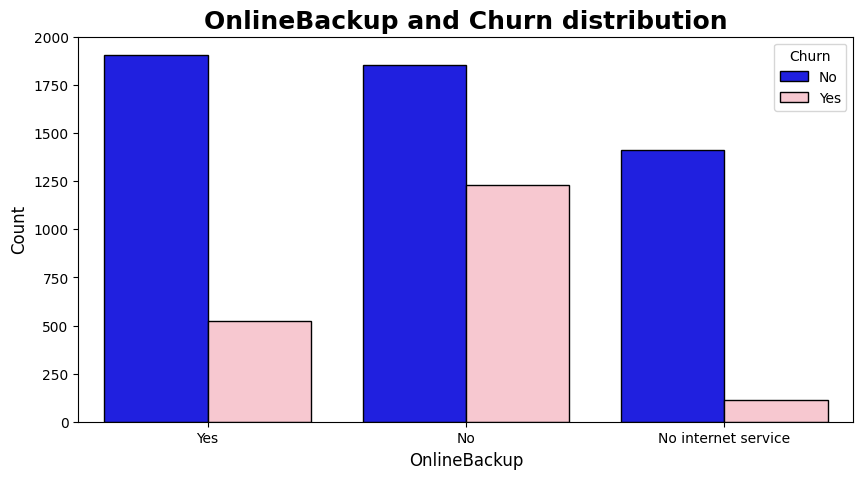

In [42]:
bivariate_bar('OnlineBackup')

### DeviceProtection

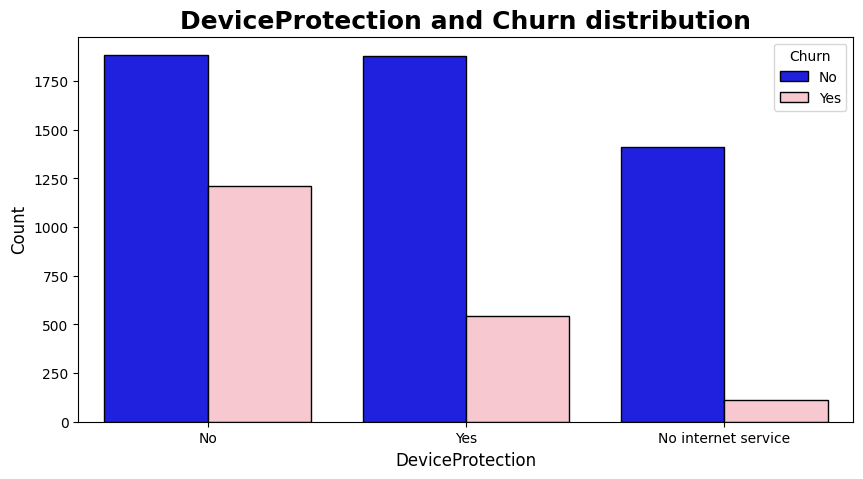

In [43]:
bivariate_bar('DeviceProtection')

### TechSupport

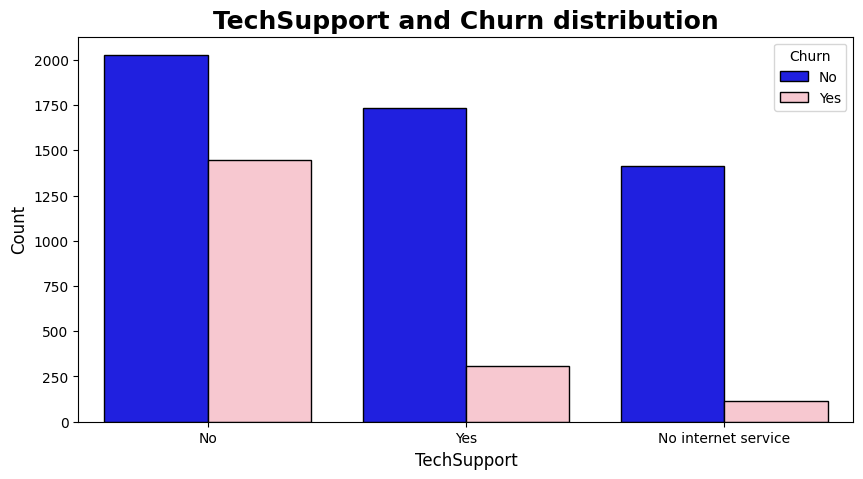

In [44]:
bivariate_bar('TechSupport')

### StreamingTV

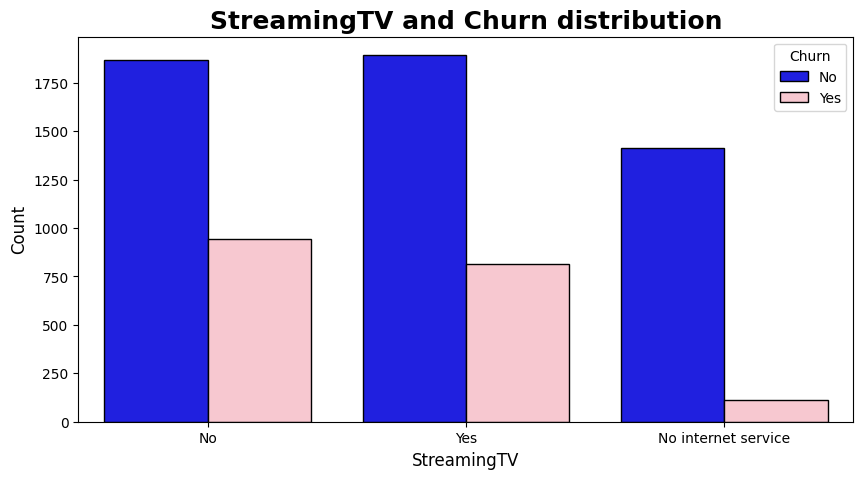

In [45]:
bivariate_bar('StreamingTV')

### StreamingMovies

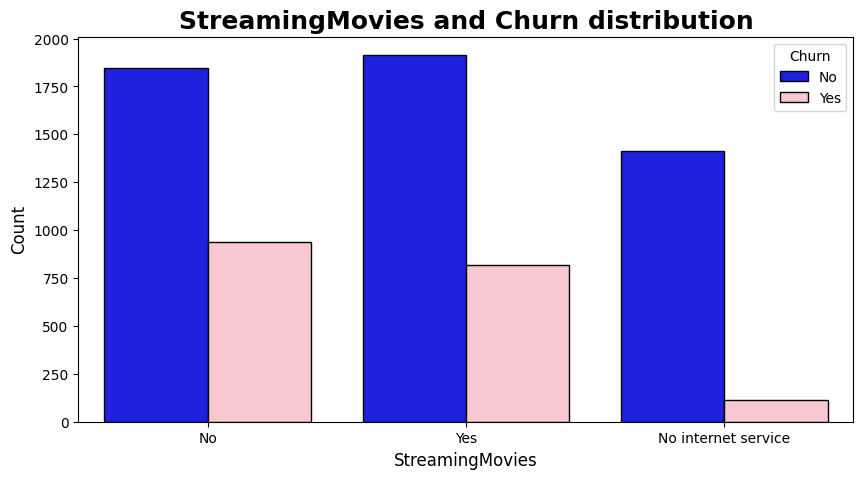

In [46]:
bivariate_bar('StreamingMovies')

### Contract

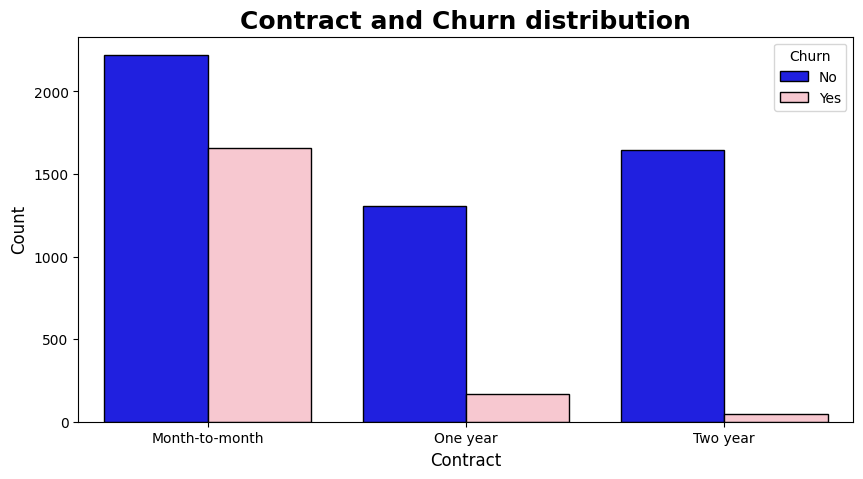

In [47]:
bivariate_bar('Contract')

### PaperlessBilling

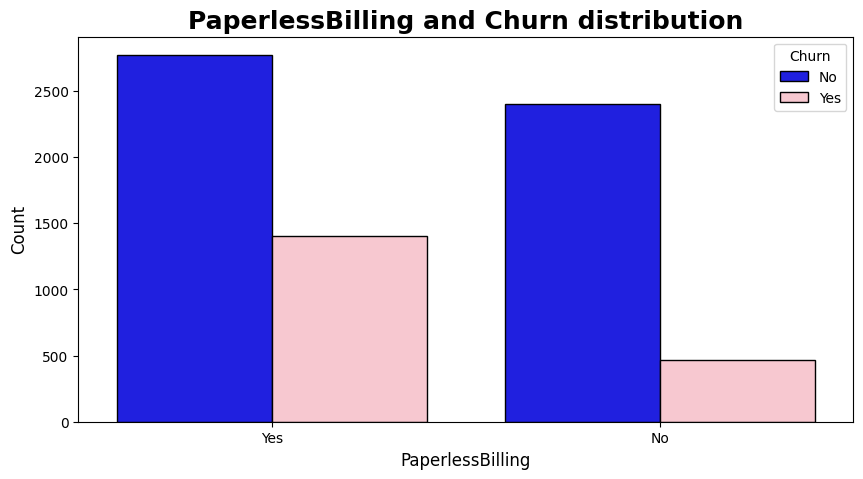

In [48]:
bivariate_bar('PaperlessBilling')

### PaymentMethod

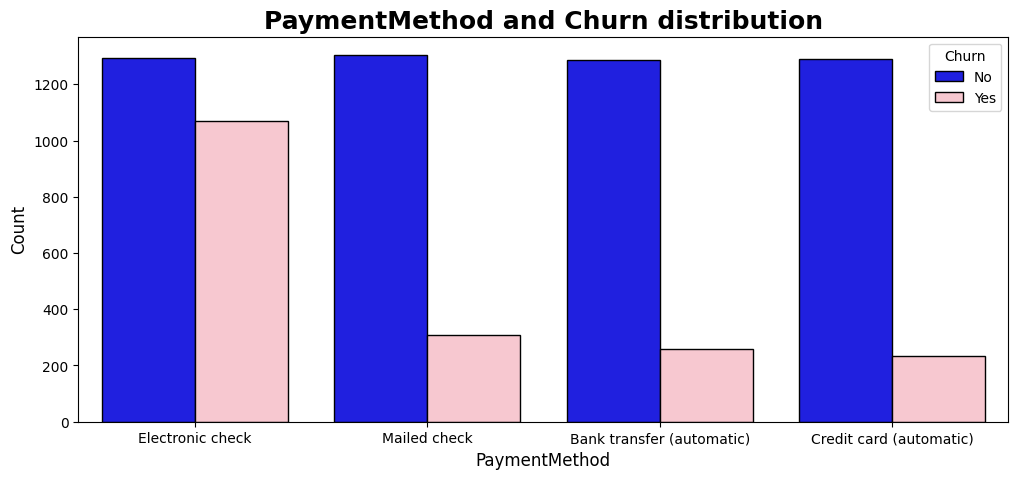

In [49]:
bivariate_bar('PaymentMethod', size=(12, 5))

### MonthlyCharges

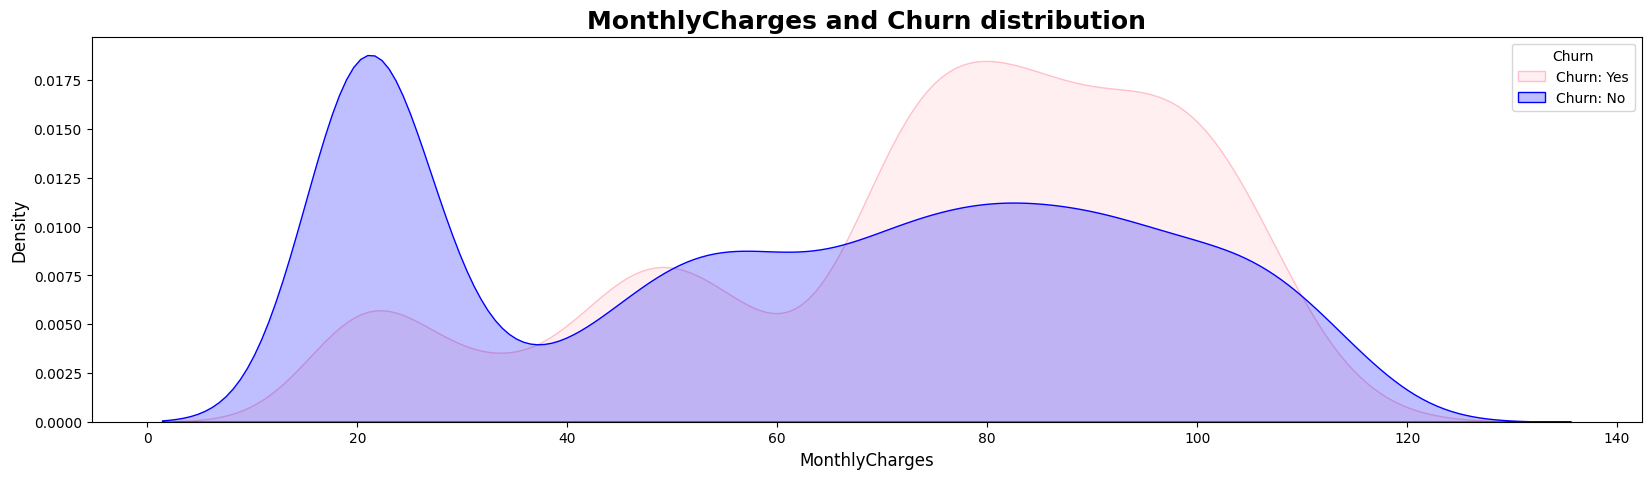

In [50]:
bivariate_kdeplot('MonthlyCharges', size=(20, 5))

### TotalCharges

In [51]:
df['TotalCharges'].fillna(0, inplace=True)

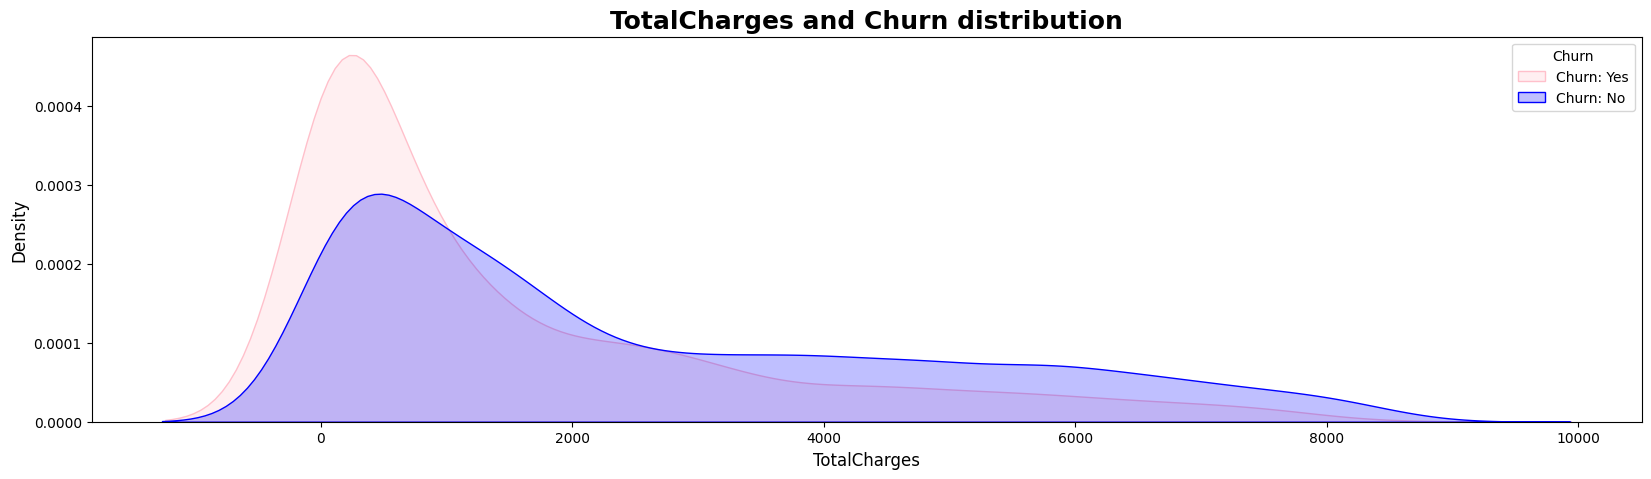

In [52]:
bivariate_kdeplot('TotalCharges', size=(20, 5))

## Multivariate

In [53]:
def Multivariate_bar(col1, col2):
    data = df[[col1, col2, 'Churn']].groupby([col1, col2, 'Churn']).agg('size').reset_index(name='Count')
    g = sns.catplot(data=data, x=col1, y='Count', hue='Churn', col=col2, kind='bar', palette='bright', height=6, aspect=1.2)
    g.set_titles("{col_name} " + col2)
    g.set_axis_labels(col1, "Count")
    g._legend.set_title('Obesity Level')
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Distribution of Obesity Levels by {col1} and {col2}', fontsize=16, fontweight='bold', color='navy')
    plt.show()

def Multivariate_numerical(column, column2):
    plt.figure(figsize=(15, 6))

    # KDE Plot for Female
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=df[df[column2] == 0], x=column, hue='Churn', fill=True, palette='bright', common_norm=False)
    plt.title(f'KDE Plot of Obesity Levels by {column} (Female)', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel(column, fontsize=14, fontweight='bold')
    plt.ylabel('Density', fontsize=14, fontweight='bold')
    sns.despine()
    female_ylim = plt.gca().get_ylim()

    # KDE Plot for Male
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df[df[column2] == 1], x=column, hue='Churn', fill=True, palette='bright', common_norm=False)
    plt.title(f'KDE Plot of Obesity Levels by {column} (Male)', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel(column, fontsize=14, fontweight='bold')
    plt.ylabel('Density', fontsize=14, fontweight='bold')
    sns.despine()
    male_ylim = plt.gca().get_ylim()

    # Set the same y-limit for both plots
    max_ylim = max(female_ylim[1], male_ylim[1])
    plt.subplot(1, 2, 1)
    plt.ylim(0, max_ylim)
    plt.subplot(1, 2, 2)
    plt.ylim(0, max_ylim)

    plt.tight_layout()
    plt.show()

# Preprocessing Data

In [54]:
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['Churn'] = le.fit_transform(df['Churn'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

# df['TotalCharges'] = np.sqrt(df['TotalCharges'])
df['TotalCharges'].fillna(0, inplace=True)

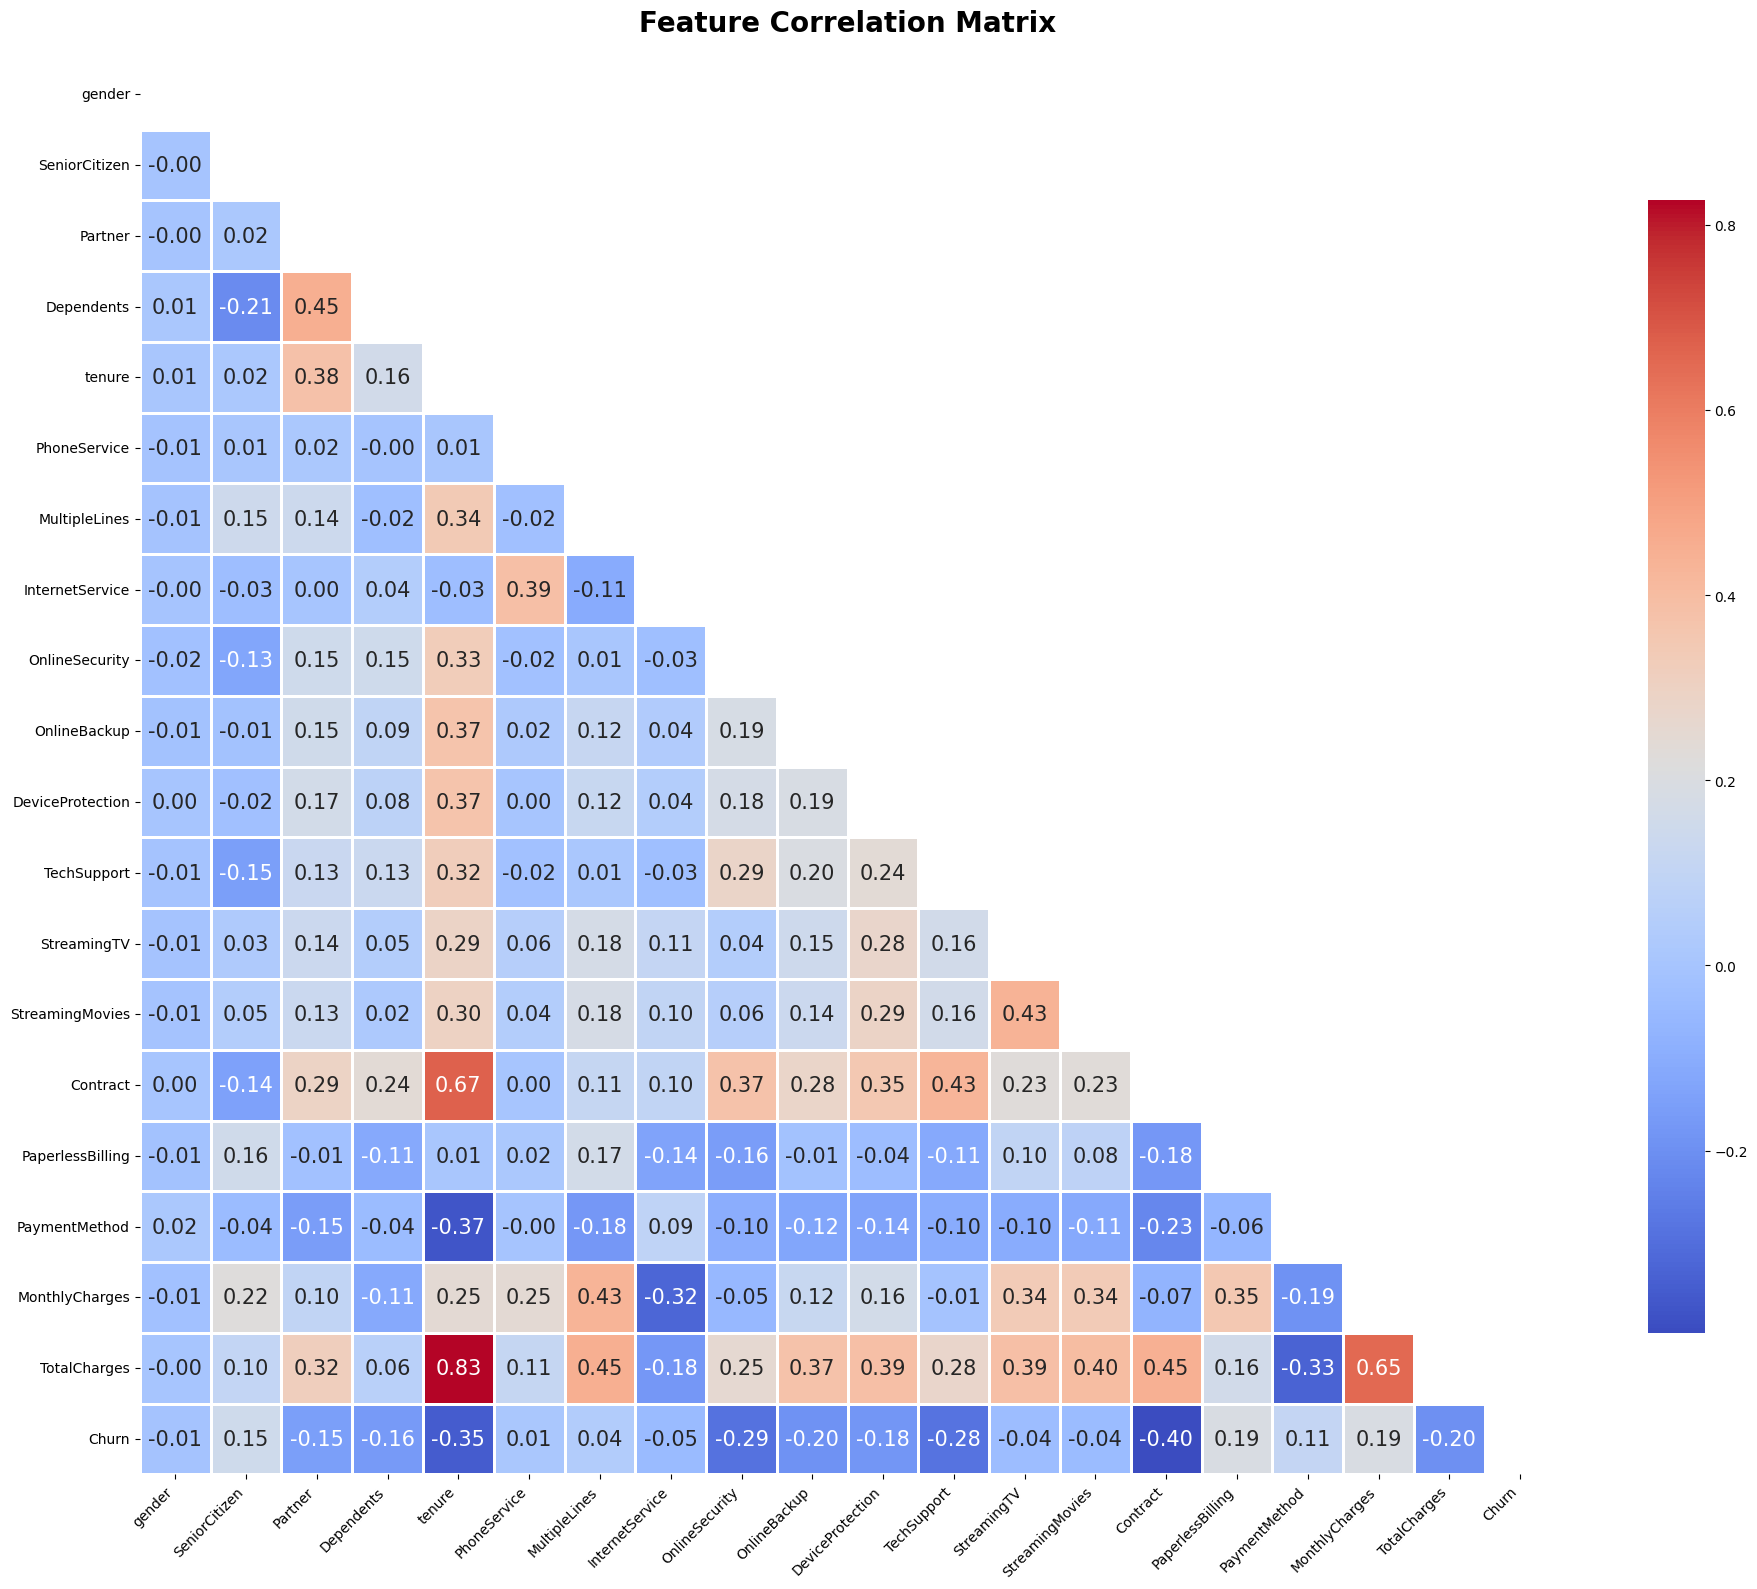

In [55]:
# Create correlation matrix
plt.figure(figsize=(20, 16))

# Generate correlation matrix
corr = df.drop(columns=['customerID']).corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate heatmap with enhanced styling
sns.heatmap(corr, 
            mask=mask,
            annot=True, 
            cmap='coolwarm',
            fmt='.2f',
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 15})

# Enhance title and layout
plt.title('Feature Correlation Matrix', 
          pad=20, 
          size=20, 
          fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

# Modeling

In [56]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['customerID', 'Churn', 'TotalCharges'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote_enn = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote_enn.fit_resample(X_train, y_train)

## Logistic Regression

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression model
logreg_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, n_jobs=-1)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)
y_train_pred_logreg = logreg_model.predict(X_train)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
train_accuracy_logreg = accuracy_score(y_train, y_train_pred_logreg)

conf_matrix_logreg_ori = confusion_matrix(y_test, y_pred_logreg)
train_conf_matrix_logreg = confusion_matrix(y_train, y_train_pred_logreg)

class_report_logreg = classification_report(y_test, y_pred_logreg)
train_class_report_logreg = classification_report(y_train, y_train_pred_logreg)

print(f'Train Accuracy: {train_accuracy_logreg:.4f}')
print(f'Test Accuracy: {accuracy_logreg:.4f}\n')
print(f'Train Precision: {precision_score(y_train, y_train_pred_logreg):.4f}')
print(f'Test Precision: {precision_score(y_test, y_pred_logreg):.4f}\n')
print(f'Train Recall: {recall_score(y_train, y_train_pred_logreg):.4f}')
print(f'Test Recall: {recall_score(y_test, y_pred_logreg):.4f}\n')
print(f'Train F1 Score: {f1_score(y_train, y_train_pred_logreg):.4f}')
print(f'Test F1 Score: {f1_score(y_test, y_pred_logreg):.4f}\n')

print(f'Train Classification Report:\n{train_class_report_logreg}')
print(f'Test Classification Report:\n{class_report_logreg}')

Train Accuracy: 0.7444
Test Accuracy: 0.7551

Train Precision: 0.5121
Test Precision: 0.5239

Train Recall: 0.7934
Test Recall: 0.8231

Train F1 Score: 0.6224
Test F1 Score: 0.6403

Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      4138
           1       0.51      0.79      0.62      1496

    accuracy                           0.74      5634
   macro avg       0.71      0.76      0.71      5634
weighted avg       0.80      0.74      0.76      5634

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.82      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.81      0.76      0.77      1409



In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression model
logreg_model = LogisticRegression(random_state=42, max_iter=100, multi_class='ovr')

# Train the model
logreg_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)
y_train_smote_pred_logreg = logreg_model.predict(X_train_smote)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
train_accuracy_logreg = accuracy_score(y_train_smote, y_train_smote_pred_logreg)

conf_matrix_logreg_over = confusion_matrix(y_test, y_pred_logreg)
train_conf_matrix_logreg = confusion_matrix(y_train_smote, y_train_smote_pred_logreg)

class_report_logreg = classification_report(y_test, y_pred_logreg)
train_class_report_logreg = classification_report(y_train_smote, y_train_smote_pred_logreg)

print(f'Train Accuracy: {train_accuracy_logreg:.4f}')
print(f'Test Accuracy: {accuracy_logreg:.4f}\n')
print(f'Train Precision: {precision_score(y_train_smote, y_train_smote_pred_logreg):.4f}')
print(f'Test Precision: {precision_score(y_test, y_pred_logreg):.4f}\n')
print(f'Train Recall: {recall_score(y_train_smote, y_train_smote_pred_logreg):.4f}')
print(f'Test Recall: {recall_score(y_test, y_pred_logreg):.4f}\n')
print(f'Train F1 Score: {f1_score(y_train_smote, y_train_smote_pred_logreg):.4f}')
print(f'Test F1 Score: {f1_score(y_test, y_pred_logreg):.4f}\n')

print(f'Train Classification Report:\n{train_class_report_logreg}')
print(f'Test Classification Report:\n{class_report_logreg}')

Train Accuracy: 0.7869
Test Accuracy: 0.7743

Train Precision: 0.7694
Test Precision: 0.5518

Train Recall: 0.8192
Test Recall: 0.7855

Train F1 Score: 0.7935
Test F1 Score: 0.6482

Train Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      4138
           1       0.77      0.82      0.79      4138

    accuracy                           0.79      8276
   macro avg       0.79      0.79      0.79      8276
weighted avg       0.79      0.79      0.79      8276

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.79      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.77      0.78      1409



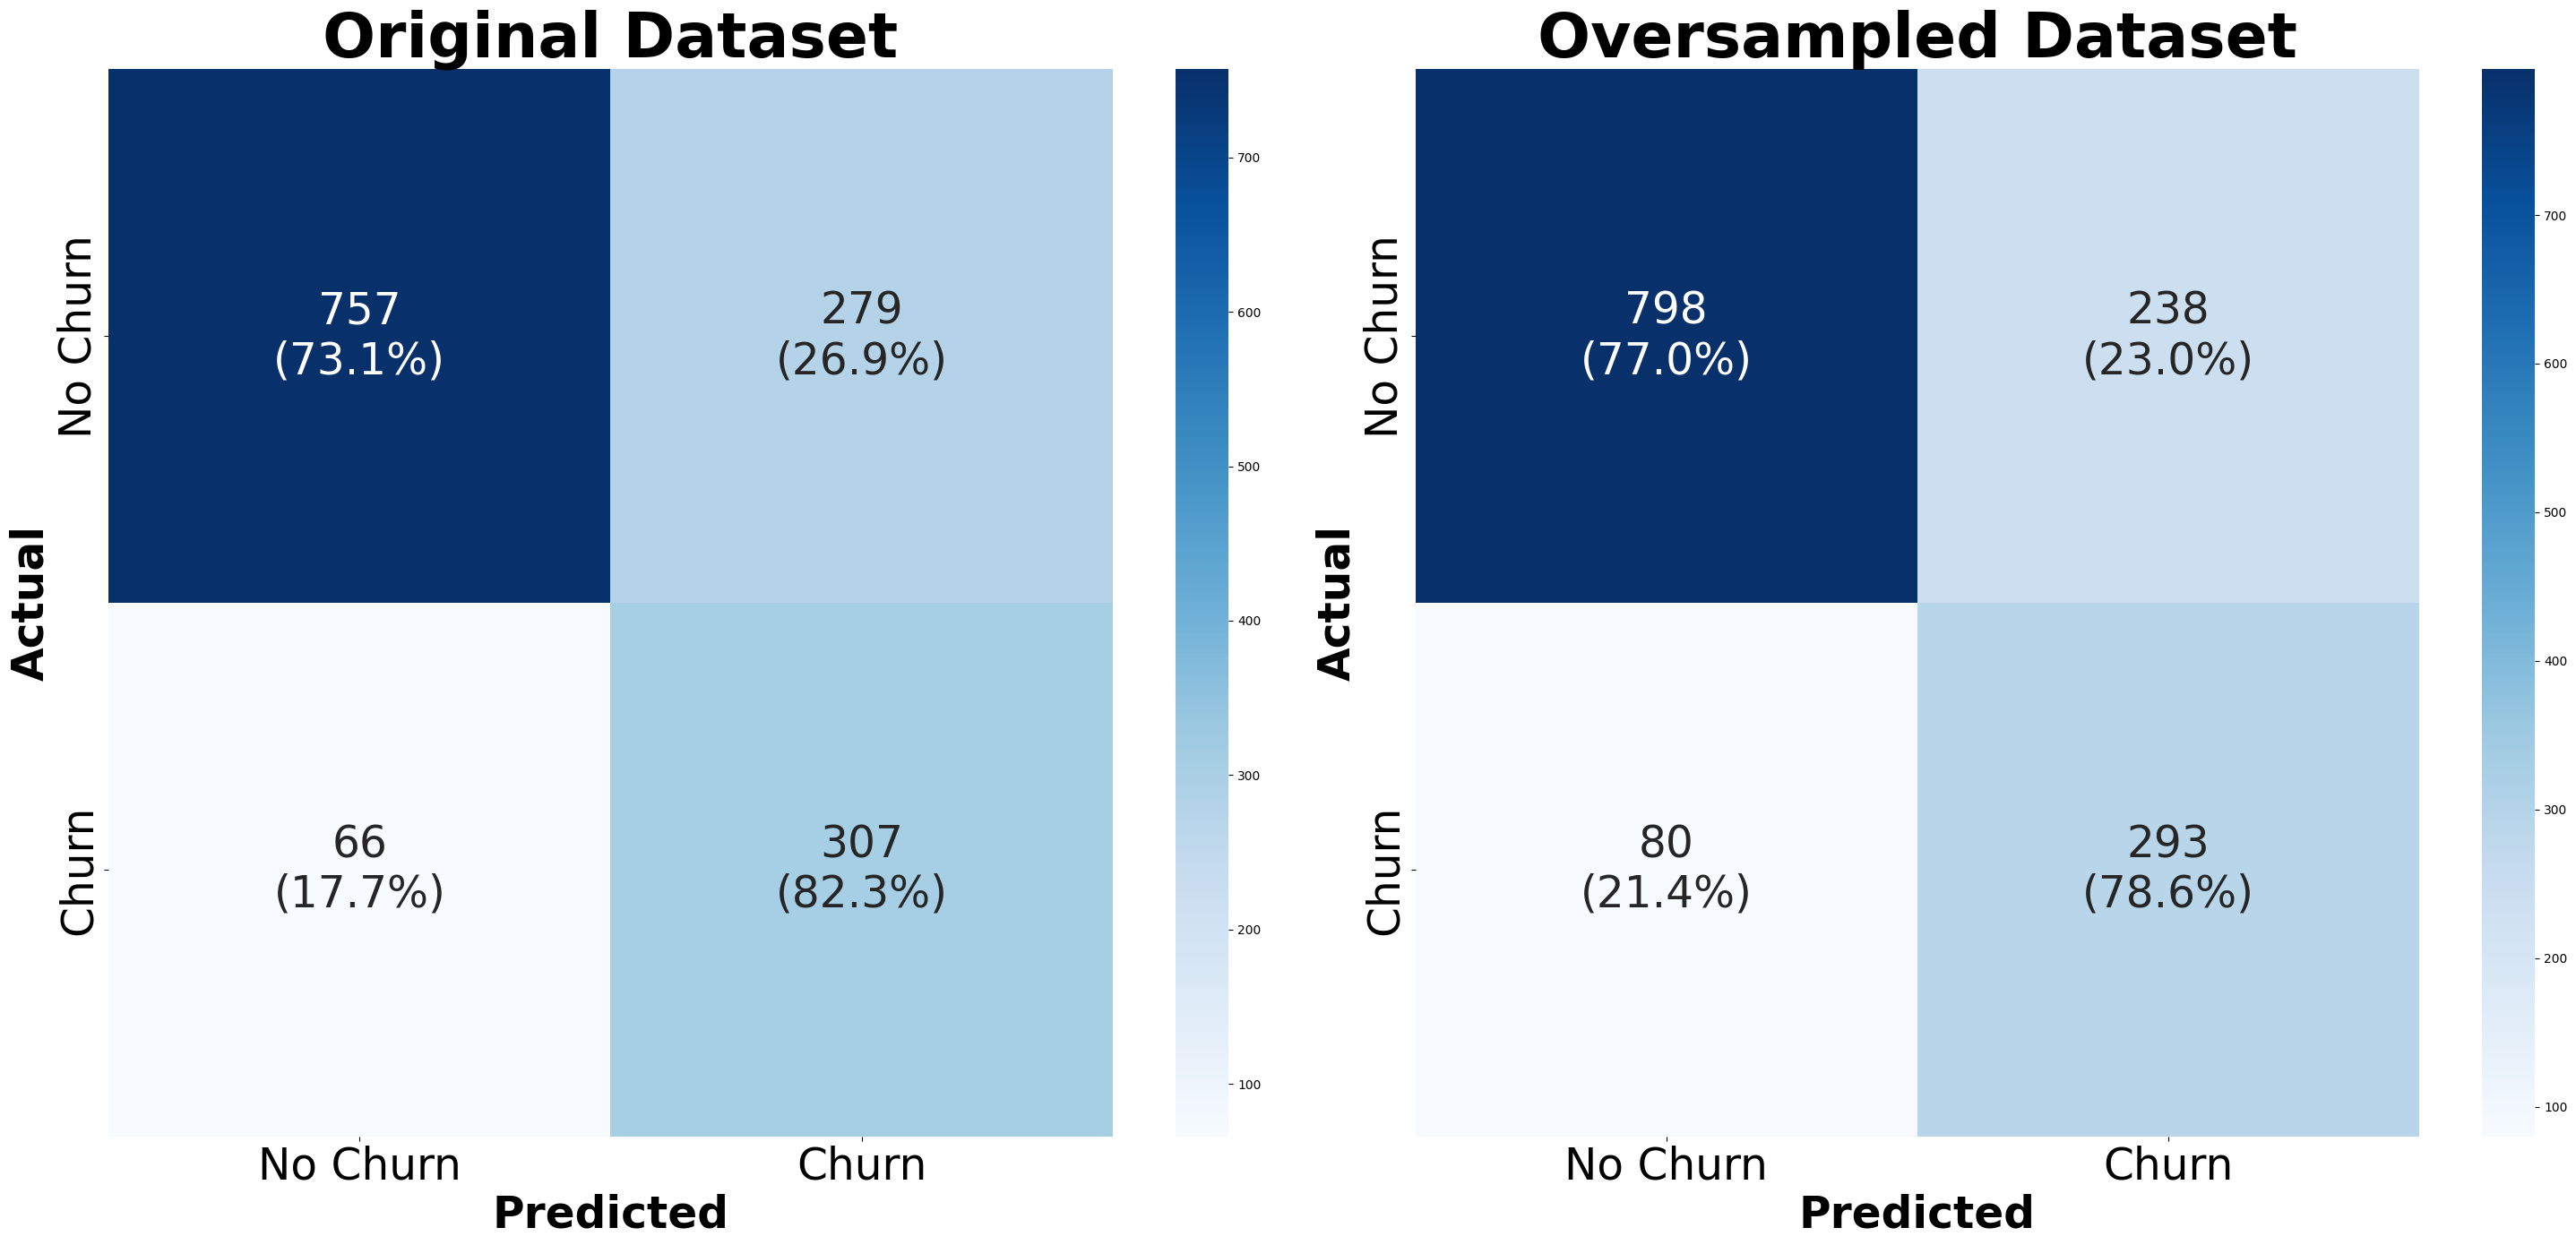

In [59]:
# Calculate percentages for original and oversampled matrices
conf_matrix_logreg_ori_percent = conf_matrix_logreg_ori / conf_matrix_logreg_ori.sum(axis=1)[:, np.newaxis] * 100
conf_matrix_logreg_over_percent = conf_matrix_logreg_over / conf_matrix_logreg_over.sum(axis=1)[:, np.newaxis] * 100

# Create labels with absolute numbers and percentages
labels_ori = np.array([f"{val}\n({perc:.1f}%)" 
                   for val, perc in zip(conf_matrix_logreg_ori.flatten(), conf_matrix_logreg_ori_percent.flatten())])
labels_ori = labels_ori.reshape(conf_matrix_logreg_ori.shape)

labels_over = np.array([f"{val}\n({perc:.1f}%)" 
                    for val, perc in zip(conf_matrix_logreg_over.flatten(), conf_matrix_logreg_over_percent.flatten())])
labels_over = labels_over.reshape(conf_matrix_logreg_over.shape)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 14))

# Plot original confusion matrix
sns.heatmap(conf_matrix_logreg_ori, annot=labels_ori, fmt='', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], 
            annot_kws={"size": 35}, ax=ax1)
ax1.set_xlabel('Predicted', fontsize=35, fontweight='bold')
ax1.set_ylabel('Actual', fontsize=35, fontweight='bold')
ax1.tick_params(labelsize=35)
ax1.set_title('Original Dataset', fontsize=50, fontweight='bold')

# Plot oversampled confusion matrix
sns.heatmap(conf_matrix_logreg_over, annot=labels_over, fmt='', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], 
            annot_kws={"size": 35}, ax=ax2)
ax2.set_xlabel('Predicted', fontsize=35, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=35, fontweight='bold')
ax2.tick_params(labelsize=35)
ax2.set_title('Oversampled Dataset', fontsize=50, fontweight='bold')

plt.tight_layout()
plt.show()


## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=6
                                  ,)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make prediction
y_pred_rf = rf_model.predict(X_test)
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
train_roc_auc_rf = roc_auc_score(y_train, y_train_pred_rf)

conf_matrix_rf_ori = confusion_matrix(y_test, y_pred_rf)
train_conf_matrix_rf = confusion_matrix(y_train, y_train_pred_rf)

class_report_rf = classification_report(y_test, y_pred_rf)
train_class_report_rf = classification_report(y_train, y_train_pred_rf)

print(f'Train Accuracy: {train_accuracy_rf:.4f}')
print(f'Test Accuracy: {accuracy_rf:.4f}\n')
print(f'Train Precision: {precision_score(y_train, y_train_pred_rf):.4f}')
print(f'Test Precision: {precision_score(y_test, y_pred_rf):.4f}\n')
print(f'Train Recall: {recall_score(y_train, y_train_pred_rf):.4f}')
print(f'Test Recall: {recall_score(y_test, y_pred_rf):.4f}\n')
print(f'Train F1 Score: {f1_score(y_train, y_train_pred_rf):.4f}')
print(f'Test F1 Score: {f1_score(y_test, y_pred_rf):.4f}\n')
print(f'Train ROC AUC: {train_roc_auc_rf:.4f}')
print(f'Test ROC AUC: {roc_auc_rf:.4f}\n')

print(f'Train Classification Report:\n{train_class_report_rf}')
print(f'Test Classification Report:\n{class_report_rf}')

Train Accuracy: 0.7710
Test Accuracy: 0.7700

Train Precision: 0.5460
Test Precision: 0.5438

Train Recall: 0.8175
Test Recall: 0.8150

Train F1 Score: 0.6547
Test F1 Score: 0.6524

Train ROC AUC: 0.7859
Test ROC AUC: 0.7844

Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      4138
           1       0.55      0.82      0.65      1496

    accuracy                           0.77      5634
   macro avg       0.73      0.79      0.74      5634
weighted avg       0.82      0.77      0.78      5634

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1036
           1       0.54      0.82      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

rf_model = RandomForestClassifier(random_state=42, max_depth=4)

# Train the model
rf_model.fit(X_train_smote, y_train_smote)

# Make prediction
y_pred_rf = rf_model.predict(X_test)
y_train_smote_pred_rf = rf_model.predict(X_train_smote)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
train_accuracy_rf = accuracy_score(y_train_smote, y_train_smote_pred_rf)

roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
train_roc_auc_rf = roc_auc_score(y_train_smote, y_train_smote_pred_rf)

conf_matrix_rf_over = confusion_matrix(y_test, y_pred_rf)
train_conf_matrix_rf = confusion_matrix(y_train_smote, y_train_smote_pred_rf)

class_report_rf_over = classification_report(y_test, y_pred_rf)
train_class_report_rf = classification_report(y_train_smote, y_train_smote_pred_rf)

print(f'Train Accuracy: {train_accuracy_rf:.4f}')
print(f'Test Accuracy: {accuracy_rf:.4f}\n')
print(f'Train Precision: {precision_score(y_train_smote, y_train_smote_pred_rf):.4f}')
print(f'Test Precision: {precision_score(y_test, y_pred_rf):.4f}\n')
print(f'Train Recall: {recall_score(y_train_smote, y_train_smote_pred_rf):.4f}')
print(f'Test Recall: {recall_score(y_test, y_pred_rf):.4f}\n')
print(f'Train F1 Score: {f1_score(y_train_smote, y_train_smote_pred_rf):.4f}')
print(f'Test F1 Score: {f1_score(y_test, y_pred_rf):.4f}\n')
print(f'Train ROC AUC: {train_roc_auc_rf:.4f}')
print(f'Test ROC AUC: {roc_auc_rf:.4f}\n')

print(f'Train Classification Report:\n{train_class_report_rf}')
print(f'Test Classification Report:\n{class_report_rf}')

Train Accuracy: 0.7840
Test Accuracy: 0.7580

Train Precision: 0.7630
Test Precision: 0.5280

Train Recall: 0.8238
Test Recall: 0.8097

Train F1 Score: 0.7922
Test F1 Score: 0.6392

Train ROC AUC: 0.7840
Test ROC AUC: 0.7745

Train Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      4138
           1       0.76      0.82      0.79      4138

    accuracy                           0.78      8276
   macro avg       0.79      0.78      0.78      8276
weighted avg       0.79      0.78      0.78      8276

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1036
           1       0.54      0.82      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



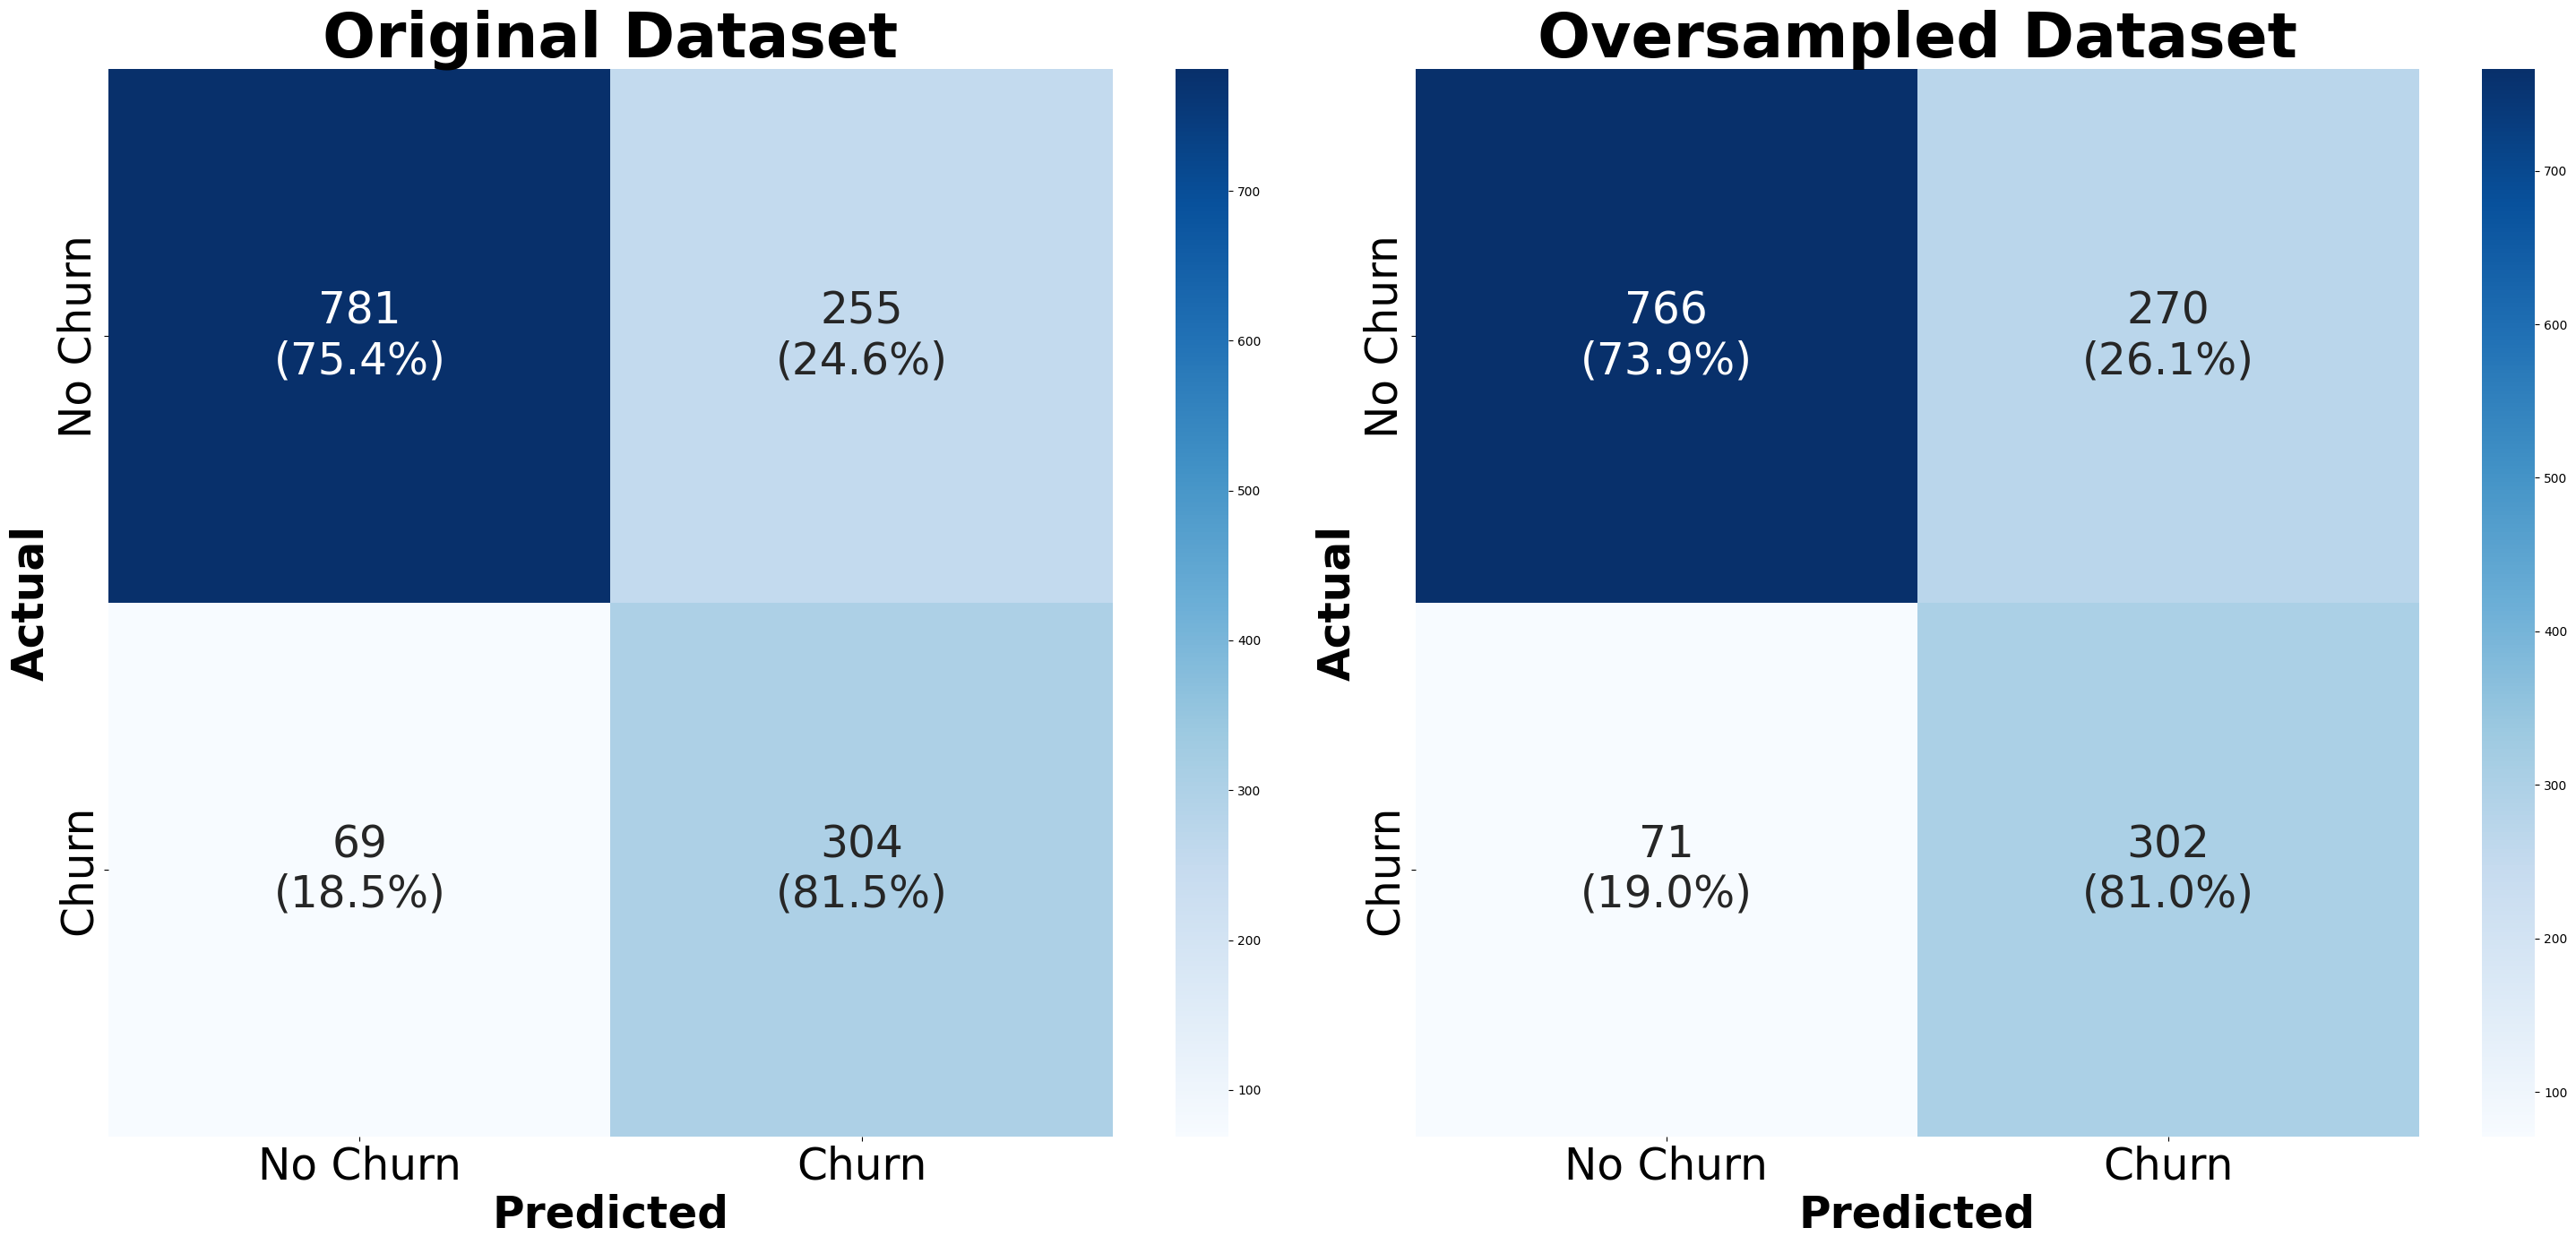

In [62]:
# Calculate percentages for original and oversampled matrices
conf_matrix_rf_ori_percent = conf_matrix_rf_ori / conf_matrix_rf_ori.sum(axis=1)[:, np.newaxis] * 100
conf_matrix_rf_over_percent = conf_matrix_rf_over / conf_matrix_rf_over.sum(axis=1)[:, np.newaxis] * 100

# Create labels with absolute numbers and percentages
labels_ori = np.array([f"{val}\n({perc:.1f}%)" 
                   for val, perc in zip(conf_matrix_rf_ori.flatten(), conf_matrix_rf_ori_percent.flatten())])
labels_ori = labels_ori.reshape(conf_matrix_rf_ori.shape)

labels_over = np.array([f"{val}\n({perc:.1f}%)" 
                    for val, perc in zip(conf_matrix_rf_over.flatten(), conf_matrix_rf_over_percent.flatten())])
labels_over = labels_over.reshape(conf_matrix_rf_over.shape)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 14))

# Plot original confusion matrix
sns.heatmap(conf_matrix_rf_ori, annot=labels_ori, fmt='', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], 
            annot_kws={"size": 35}, ax=ax1)
ax1.set_xlabel('Predicted', fontsize=35, fontweight='bold')
ax1.set_ylabel('Actual', fontsize=35, fontweight='bold')
ax1.tick_params(labelsize=35)
ax1.set_title('Original Dataset', fontsize=50, fontweight='bold')

# Plot oversampled confusion matrix
sns.heatmap(conf_matrix_rf_over, annot=labels_over, fmt='', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], 
            annot_kws={"size": 35}, ax=ax2)
ax2.set_xlabel('Predicted', fontsize=35, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=35, fontweight='bold')
ax2.tick_params(labelsize=35)
ax2.set_title('Oversampled Dataset', fontsize=50, fontweight='bold')

plt.tight_layout()
plt.show()

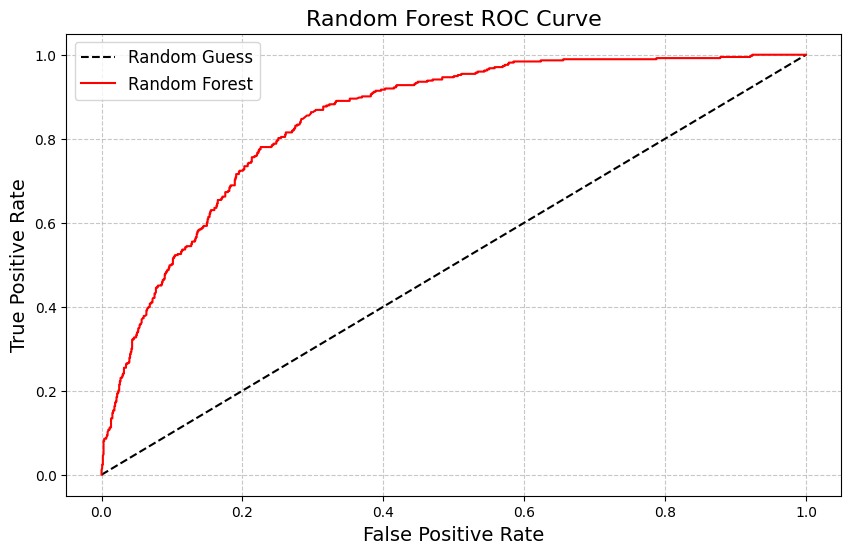

In [63]:
from sklearn.metrics import roc_curve

# Calculate the ROC curve
y_rfpred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='r')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Random Forest ROC Curve', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

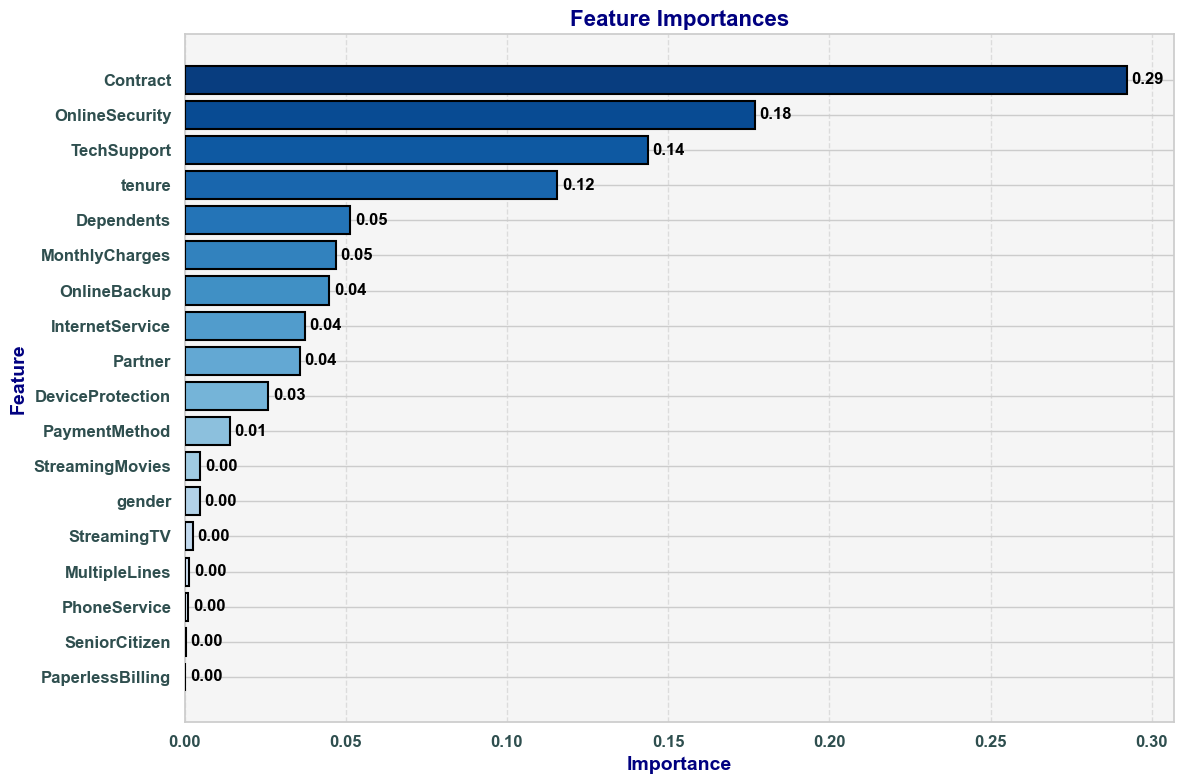

In [64]:
sns.set(style="whitegrid")

# Plot the feature importances
plt.figure(figsize=(12, 8))
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False)
# Create horizontal bars with rounded corners and a shadow effect
bars = plt.barh(feature_importances['Feature'], feature_importances['Importance'], 
                color=sns.color_palette("Blues_r", len(feature_importances)), 
                edgecolor='black', linewidth=1.5, zorder=3)

# Add a background color to the plot for a more polished look
plt.gca().set_facecolor('whitesmoke')

# Add title and labels with customized font
plt.xlabel('Importance', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('Feature', fontsize=14, fontweight='bold', color='navy')
plt.title('Feature Importances', fontsize=16, fontweight='bold', color='navy')

# Invert y-axis to show the most important features on top
plt.gca().invert_yaxis()

# Customize grid with dashed lines and set alpha for transparency
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=0)

# Customize ticks for better appearance
plt.xticks(fontsize=12, fontweight='bold', color='darkslategray')
plt.yticks(fontsize=12, fontweight='bold', color='darkslategray')

# Add value labels to the bars, with a shadow effect for better contrast
for bar in bars:
    plt.text(bar.get_width() + 0.0015, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=12, 
             color='black', fontweight='bold', zorder=4)

# Display the plot with tight layout for better spacing
plt.tight_layout()
plt.show()


## Usage

In [65]:
import joblib
joblib.dump(logreg_model, 'logreg_model.pkl')

['logreg_model.pkl']

In [66]:
loaded_model = joblib.load('logreg_model.pkl')
y_pred = loaded_model.predict(X_test)